In [1]:
import polars as pl                         # Fast dataframes for financial data
import numpy as np                          # Numerical computing library
from datetime import datetime, timedelta    # Date and time operations
import random


# Machine learning libraries  
import torch                                # PyTorch framework
import torch.nn as nn                       # Neural network modules
import torch.optim as optim                 # Optimization algorithms                          


# Visualization and 
import altair as alt                        # Interactive visualization library
from xrp_model import research, binance, models

In [2]:
sym ='XRPUSDT'
forecast_horizon = 1

In [3]:
start_date = datetime(2023, 2, 11, 0, 0)
end_date   = datetime(2026, 2, 11, 0, 0)

In [4]:
time_interval = '8h'
ts = research.load_ohlc_timeseries_range(sym, time_interval, start_date, end_date)

Loading XRPUSDT: 100%|██████████| 1097/1097 [00:24<00:00, 44.93day/s]


In [5]:
no_lags = 6
ts = research.add_log_return_features(ts, 'close', forecast_horizon, max_no_lags=no_lags)

In [6]:
target = 'close_log_return'

In [7]:
feature_pool = [f'{target}_lag_{i}' for i in range(1, no_lags + 1)]

In [8]:
research.set_seed(99)

In [9]:
annualized_rate = research.sharpe_annualization_factor(time_interval, 365, 24)

In [10]:
pl.Config.set_fmt_str_lengths(200)

polars.config.Config

In [11]:
research.benchmark_linear_models(ts.drop_nulls(), target, feature_pool, annualized_rate, max_no_features=5, no_epochs=200, loss=nn.MSELoss(), test_size=0.25)

features,target,no_trades,win_rate,avg_win,avg_loss,best_trade,worst_trade,ev,std,total_log_return,compound_return,max_drawdown,equity_trough,equity_peak,sharpe,weights,biases
str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,close_log_return_lag_5""","""close_log_return""",821,0.499391,0.016165,-0.012445,0.157585,-0.076803,0.001843,0.020714,1.512917,4.539954,-0.341836,-0.022825,1.625543,2.943779,"""[ 0.03134654 0.05952642 -0.06342151 0.02456243]""","""0.0007475657621398568"""
"""close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,close_log_return_lag_5,close_log_return_lag_6""","""close_log_return""",821,0.498173,0.015756,-0.01286,0.157585,-0.076803,0.001396,0.020749,1.145801,3.144959,-0.303334,-0.197163,1.265954,2.225701,"""[ 0.03051166 0.05992945 -0.06166928 0.02261927 0.02987845]""","""0.0007277351687662303"""
"""close_log_return_lag_1,close_log_return_lag_3,close_log_return_lag_5""","""close_log_return""",821,0.503045,0.015596,-0.012994,0.157585,-0.099587,0.001388,0.02075,1.139341,3.124708,-0.495081,-0.121647,1.332671,2.213096,"""[ 0.03095321 -0.06114309 0.02202757]""","""0.0007930193096399307"""
"""close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,close_log_return_lag_4,close_log_return_lag_5""","""close_log_return""",821,0.485993,0.015917,-0.012777,0.157585,-0.062058,0.001169,0.020763,0.959354,2.61001,-0.407956,-0.035502,1.079508,1.86227,"""[ 0.02720439 0.06290077 -0.06110439 -0.04126434 0.02674682]""","""0.000773525214754045"""
"""close_log_return_lag_1,close_log_return_lag_3,close_log_return_lag_5,close_log_return_lag_6""","""close_log_return""",821,0.498173,0.015509,-0.013106,0.157585,-0.099587,0.001149,0.020765,0.943669,2.569391,-0.323795,-0.161443,0.990755,1.831729,"""[ 0.0302684 -0.05921075 0.02105919 0.03346564]""","""0.0007684847805649042"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""close_log_return_lag_1,close_log_return_lag_6""","""close_log_return""",821,0.464068,0.014223,-0.014372,0.157585,-0.146504,-0.001102,0.020767,-0.904848,0.404603,-1.169492,-1.150193,0.019299,-1.756157,"""[0.02245517 0.0403351 ]""","""0.0007404841599054635"""
"""close_log_return_lag_4""","""close_log_return""",821,0.454324,0.014216,-0.014376,0.157585,-0.146504,-0.001386,0.02075,-1.13771,0.320552,-1.395493,-1.244797,0.150697,-2.209913,"""[-0.0390486]""","""0.0008183864410966635"""
"""close_log_return_lag_4,close_log_return_lag_6""","""close_log_return""",821,0.464068,0.013821,-0.01472,0.157585,-0.146504,-0.001475,0.020744,-1.211195,0.297841,-1.658374,-1.348666,0.309709,-2.353353,"""[-0.04411978 0.04237733]""","""0.0007937808986753225"""


In [12]:
class LinearModel(nn.Module):
    def __init__(self, input_features):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_features, 1)

    def forward(self, x):
        return self.linear(x)

In [13]:
input_features = 4

linear_model = LinearModel(input_features)

research.print_model_info(linear_model, "Linear Model")
research.total_model_params(linear_model)


Linear Model

Architecture:
  LinearModel(
  (linear): Linear(in_features=4, out_features=1, bias=True)
)

Parameter Count:
  Total parameters:      5
  Trainable parameters:  5



5

In [14]:
features = ['close_log_return_lag_1','close_log_return_lag_2','close_log_return_lag_3','close_log_return_lag_5']

model = LinearModel(len(features))
model.apply(research.init_weights)
model_trades = research.learn_model_trades(ts.drop_nulls(), features, target, model, loss=nn.MSELoss())

research.plot_column(model_trades, 'equity_curve')

alt.Chart(...)

In [15]:
taker_fee = 0.00045

shape: (1, 3)
┌───────────┬────────────┬──────────┐
│ flip_rate ┆ mean_gross ┆ mean_net │
│ ---       ┆ ---        ┆ ---      │
│ f64       ┆ f32        ┆ f64      │
╞═══════════╪════════════╪══════════╡
│ 0.479903  ┆ 0.001843   ┆ 0.001411 │
└───────────┴────────────┴──────────┘


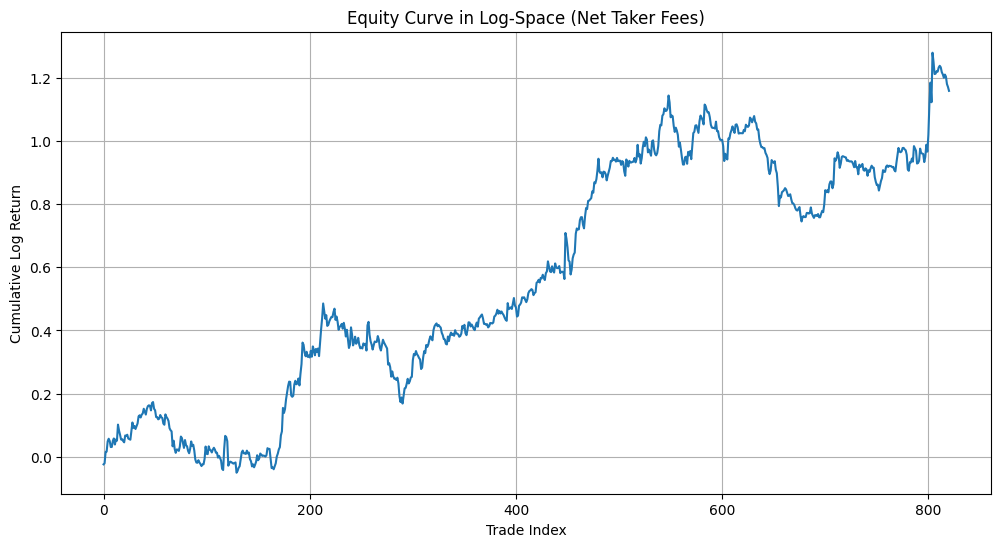

In [16]:
roundtrip_fee_log = float(np.log(1 - 2 * taker_fee))

model_trades = (
    model_trades
    .with_columns([
        pl.col("position").cast(pl.Int8).alias("pos"),
        pl.col("position").shift(1).cast(pl.Int8).alias("pos_prev"),
    ])
    .with_columns([
        (pl.col("pos") != pl.col("pos_prev"))
        .fill_null(True)
        .alias("is_flip"),
    ])
    .with_columns([
        pl.when(pl.col("is_flip"))
          .then(pl.lit(roundtrip_fee_log))
          .otherwise(pl.lit(0.0))
          .alias("fee_log"),
    ])
    .with_columns([
        (pl.col("trade_log_return") + pl.col("fee_log"))
        .alias("trade_log_return_net_taker"),
    ])
    .with_columns([
        pl.col("trade_log_return_net_taker")
        .cum_sum()
        .alias("equity_curve_net_taker"),
    ])
)

# -------------------------
# 3) Sanity check
# -------------------------
print(
    model_trades.select([
        pl.col("is_flip").mean().alias("flip_rate"),
        pl.col("trade_log_return").mean().alias("mean_gross"),
        pl.col("trade_log_return_net_taker").mean().alias("mean_net"),
    ])
)

# -------------------------
# 4) Plot
# -------------------------
import matplotlib.pyplot as plt
import numpy as np

eq = model_trades["equity_curve_net_taker"].to_numpy()

plt.figure(figsize=(12,6))
plt.plot(eq)
plt.title("Equity Curve in Log-Space (Net Taker Fees)")
plt.xlabel("Trade Index")
plt.ylabel("Cumulative Log Return")
plt.grid(True)
plt.show()

In [17]:
r_net = model_trades["trade_log_return"].to_numpy()

N = len(r_net)
mean_r = r_net.mean()
std_r = r_net.std(ddof=1)

t_stat = mean_r / (std_r / np.sqrt(N))

print("----- GROSS PERFORMANCE -----")
print("N:", N)
print("Mean per bar:", mean_r)
print("Std per bar:", std_r)
print("t-stat:", t_stat)

----- GROSS PERFORMANCE -----
N: 821
Mean per bar: 0.0018427734
Std per bar: 0.020714467
t-stat: 2.548999455679184


In [18]:
bars_per_year = 3 * 365

ann_ret = mean_r * bars_per_year
ann_vol = std_r * np.sqrt(bars_per_year)

sharpe = ann_ret / ann_vol

print("Annualized Return:", ann_ret)
print("Annualized Vol:", ann_vol)
print("Sharpe:", sharpe)

Annualized Return: 2.0178368
Annualized Vol: 0.6854579705878996
Sharpe: 2.9437790437066167


In [19]:
r_net = model_trades["trade_log_return_net_taker"].to_numpy()

N = len(r_net)
mean_r = r_net.mean()
std_r = r_net.std(ddof=1)

t_stat = mean_r / (std_r / np.sqrt(N))

print("----- NET PERFORMANCE -----")
print("N:", N)
print("Mean per bar:", mean_r)
print("Std per bar:", std_r)
print("t-stat:", t_stat)

----- NET PERFORMANCE -----
N: 821
Mean per bar: 0.0014106666586081516
Std per bar: 0.020699574458065202
t-stat: 1.9526956692259168


In [20]:
bars_per_year = 3 * 365

ann_ret = mean_r * bars_per_year
ann_vol = std_r * np.sqrt(bars_per_year)

sharpe = ann_ret / ann_vol

print("Annualized Return:", ann_ret)
print("Annualized Vol:", ann_vol)
print("Sharpe:", sharpe)

Annualized Return: 1.544679991175926
Annualized Vol: 0.6849651517455169
Sharpe: 2.255122012031667


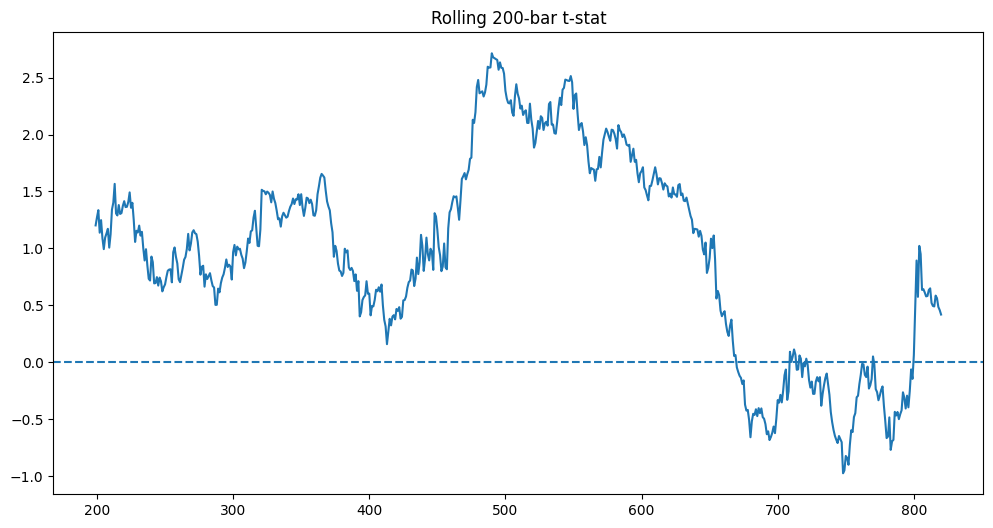

In [21]:
import pandas as pd

r_series = pd.Series(r_net)

rolling_t = (
    r_series.rolling(200)
    .apply(lambda x: x.mean() / (x.std(ddof=1) / np.sqrt(len(x))), raw=False)
)

plt.figure(figsize=(12,6))
plt.plot(rolling_t)
plt.axhline(0, linestyle='--')
plt.title("Rolling 200-bar t-stat")
plt.show()

📈 Rolling 200-Bar t-Statistic (Net Returns)

To assess whether the strategy’s edge is stable over time, we compute a rolling 200-bar t-statistic of the net log returns:

$$
t_{roll}(t) = \frac{\bar{r}{t-199:t}}{s{t-199:t} / \sqrt{200}}
$$

Where:
	•	$ \bar{r}_{t-199:t} $ = mean net log return over the last 200 bars
	•	$ s_{t-199:t} $ = standard deviation over the same window
	•	$ 200 $ = rolling window length

This measures local statistical significance, not just full-sample performance.

⸻

🎯 Why This Matters

The full-sample t-stat assumes:

$$
\mathbb{E}[r_t] = \mu \quad \text{is constant over time}
$$

But financial markets are rarely stationary.
Edges tend to be regime-dependent and time-varying.

The rolling t-stat answers a more realistic question:

“If I had only seen the last 200 bars at any point in time, would I believe this strategy has predictive power?”

⸻

🔎 What the Plot Shows

From the rolling t-stat:
	•	Extended periods where
$$
t_{roll} > 2
$$
→ Strong local statistical significance
	•	Periods where
$$
t_{roll} \approx 0
$$
→ No clear edge
	•	Some windows where
$$
t_{roll} < 0
$$
→ Temporary underperformance

This indicates the strategy is not uniformly strong across time, but rather:
	•	Persistent overall
	•	Fluctuating in strength
	•	Likely regime-sensitive

⸻

🧠 Important Interpretation

A positive full-sample t-stat (e.g., $t \approx 1.95$ net) does not imply consistent profitability.

The rolling analysis shows:
	•	The edge is distributed across time, not concentrated in a single short burst.
	•	There is no single isolated spike responsible for all performance.
	•	Performance weakens mid-sample but later partially recovers.

This is a healthier structure than a strategy whose entire Sharpe comes from one short lucky period.

⸻

📌 Takeaway

We are not just asking:

“Does this strategy make money?”

We are asking:

“Does this strategy exhibit persistent statistical structure over time?”

The rolling t-stat suggests:
	•	There is signal
	•	It is time-varying
	•	It is not purely random
	•	But it is not perfectly stable either

Which is exactly what we expect in real markets.

In [22]:
r = model_trades["trade_log_return_net_taker"].to_numpy()

mid = len(r)//2

r1 = r[:mid]
r2 = r[mid:]

def compute_t(x):
    return x.mean() / (x.std(ddof=1) / np.sqrt(len(x)))

print("First half t:", compute_t(r1))
print("Second half t:", compute_t(r2))

First half t: 1.3162864133664136
Second half t: 1.4442034523986105


To verify whether the strategy’s performance is concentrated in a specific subperiod, we split the net returns into two equal halves:
	•	First half: $r_1$
	•	Second half: $r_2$

For each subsample, we compute the t-statistic:

$$
t = \frac{\bar{r}}{s / \sqrt{N}}
$$

Where:
	•	$\bar{r}$ = mean net log return
	•	$s$ = sample standard deviation
	•	$N$ = number of observations

📊 Results
	•	First half t-stat: 1.32
	•	Second half t-stat: 1.44

⸻

🎯 Interpretation

If the strategy’s edge were driven by a single lucky regime, we would expect something like:
	•	Strong t-stat in one half
	•	Near-zero or negative t-stat in the other

Instead, both halves show moderately positive and similar t-statistics.

This suggests:
	•	The signal is not concentrated in one specific time window
	•	Performance is relatively distributed across the sample
	•	The edge is not purely regime-isolated

⸻

🧠 What This Means

While neither half individually shows very strong statistical significance, the fact that both halves remain positive indicates:
	•	Temporal consistency
	•	No obvious structural breakdown between early and late periods
	•	A more stable behavior than a regime-only strategy

This strengthens the case that the observed performance is not purely the result of one favorable market phase.

In [23]:
r = model_trades["trade_log_return_net_taker"].to_numpy()
signal = model_trades["position"].to_numpy()

np.random.seed(42)
signal_shuffled = np.random.permutation(signal)

r_fake = signal_shuffled * model_trades["trade_log_return"].to_numpy()

compute_t(r_fake)

np.float64(0.44402134923920655)

🔀 Shuffled Signal Test (Random Alignment Diagnostic)

To verify that the strategy’s performance comes from predictive structure, and not from unconditional drift in returns, we perform a shuffled signal test.

We randomly permute the trading signals while keeping the realized returns unchanged:

$$
r^{fake}_t = \tilde{s}_t \cdot r_t
$$

Where:
	•	$\tilde{s}_t$ = randomly permuted signal
	•	$r_t$ = realized log return

We then compute the t-statistic of the shuffled strategy.

📊 Result

Shuffled t-stat:

$$
t_{shuffled} \approx 0.44
$$

⸻

🎯 Interpretation

If the strategy’s performance were due to:
	•	A structural upward drift in returns
	•	A bias in long exposure
	•	Or pure randomness

Then shuffling the signals would not significantly reduce the t-stat.

However, we observe:

$$
t_{original} \approx 1.95
$$

vs.

$$
t_{shuffled} \approx 0.44
$$

This indicates that:
	•	The alignment between signals and future returns matters.
	•	Predictive structure is present.
	•	The edge is not merely coming from unconditional mean returns.

⸻

🧠 Why This Test Is Important

The t-statistic depends only on:

$$
t = \frac{\bar{r}}{s / \sqrt{N}}
$$

It does not account for temporal ordering.

By shuffling the signals, we destroy any systematic alignment between predictions and outcomes.

Since the t-stat collapses toward zero, this supports the hypothesis that:

The model is capturing real, though weak, predictive information.

⸻

📌 Takeaway

The shuffled signal test acts as a basic but powerful robustness check:
	•	If performance survives shuffling → likely random
	•	If performance disappears after shuffling → signal alignment matters

In our case, the edge weakens substantially under randomization, suggesting the strategy is not purely noise.

### RECAP

At this stage, we have performed multiple structural validation checks on the strategy.

1️⃣ Full-Sample Performance

Net performance:
	•	$t \approx 1.95$
	•	Sharpe ≈ 2.25
	•	Positive mean net return after taker fees

This suggests the presence of statistical edge in the full out-of-sample period.

However, a single full-sample t-stat is not sufficient to claim robustness.

⸻

2️⃣ Rolling 200-Bar t-Statistic

We computed:

$$
t_{roll}(t) = \frac{\bar{r}{t-199:t}}{s{t-199:t} / \sqrt{200}}
$$

This revealed:
	•	Extended periods of local significance ($t > 2$)
	•	Periods of weaker performance
	•	No single isolated spike dominating the entire result

Interpretation:

The edge is time-varying but persistent, not concentrated in one short lucky window.

⸻

3️⃣ Subsample Stability (Half-Split Test)

We split the net returns into two equal halves and computed:
	•	First half: $t \approx 1.32$
	•	Second half: $t \approx 1.44$

This indicates:
	•	Performance is distributed across time
	•	No obvious structural collapse in the later period
	•	The edge is not driven by one regime only

⸻

4️⃣ Shuffled Signal Test

We randomized signal alignment:

$$
r^{fake}_t = \tilde{s}_t \cdot r_t
$$

Result:

$$
t_{shuffled} \approx 0.44
$$

Since:

$$
t_{original} \gg t_{shuffled}
$$

This suggests:
	•	Predictive alignment matters
	•	The edge is not purely unconditional drift
	•	There is real (though weak) predictive structure

⸻

📌 What Has Been Validated

So far, we have evidence that:
	•	The strategy has positive net expectancy
	•	The edge is not concentrated in one short regime
	•	Signal alignment contributes meaningfully
	•	Performance survives realistic taker fees

⸻

⚠ What Has NOT Been Validated Yet

We have not yet tested:
	•	Stability under rolling retraining
	•	Parameter sensitivity across time
	•	Structural decay under walk-forward evaluation
	•	Out-of-sample performance under multiple re-optimizations

Currently, the model has been trained once and evaluated once.

That is not sufficient for deployment-level confidence.

⸻

🎯 Logical Next Step

The correct next research step is:

Rolling walk-forward validation

This will answer:

If the model were retrained through time, would the edge persist?

Only after that test can we assess whether this is:
	•	A transient in-sample artifact
	•	Or a structurally adaptive signal

In [24]:
print(type(model_trades))
print(model_trades.shape)
print(model_trades.columns)

<class 'polars.dataframe.frame.DataFrame'>
(821, 13)
['y_pred', 'y_true', 'is_won', 'position', 'trade_log_return', 'equity_curve', 'drawdown_log_return', 'pos', 'pos_prev', 'is_flip', 'fee_log', 'trade_log_return_net_taker', 'equity_curve_net_taker']


In [25]:
model_trades.head(3)

y_pred,y_true,is_won,position,trade_log_return,equity_curve,drawdown_log_return,pos,pos_prev,is_flip,fee_log,trade_log_return_net_taker,equity_curve_net_taker
f32,f32,bool,f32,f32,f32,f32,i8,i8,bool,f64,f64,f64
0.000504,-0.022825,false,1.0,-0.022825,-0.022825,0.0,1,null,true,-0.0009,-0.023726,-0.023726
-0.000535,-0.00415,true,-1.0,0.00415,-0.018676,0.0,-1,1,true,-0.0009,0.003249,-0.020477
-0.001206,-0.035862,true,-1.0,0.035862,0.017186,0.0,-1,-1,false,0.0,0.035862,0.015386


In [26]:
model_trades.tail(3)

y_pred,y_true,is_won,position,trade_log_return,equity_curve,drawdown_log_return,pos,pos_prev,is_flip,fee_log,trade_log_return_net_taker,equity_curve_net_taker
f32,f32,bool,f32,f32,f32,f32,i8,i8,bool,f64,f64,f64
0.000964,-0.023948,false,1.0,-0.023948,1.533571,-0.091972,1,1,false,0.0,-0.023948,1.179713
0.000224,-0.009121,false,1.0,-0.009121,1.52445,-0.101093,1,1,false,0.0,-0.009121,1.170592
-0.000896,0.011534,false,-1.0,-0.011534,1.512915,-0.112627,-1,1,true,-0.0009,-0.012435,1.158157


In [27]:
import numpy as np
import polars as pl

taker_fee = 0.00045
roundtrip_fee_log = float(np.log(1 - 2 * taker_fee))

# A) Hold-until-flip (your current logic)
A = (
    model_trades
    .with_columns([
        pl.col("position").cast(pl.Int8).alias("pos"),
        pl.col("position").shift(1).cast(pl.Int8).alias("pos_prev"),
    ])
    .with_columns([
        (pl.col("pos") != pl.col("pos_prev")).fill_null(True).alias("is_flip"),
    ])
    .with_columns([
        pl.when(pl.col("is_flip"))
          .then(pl.lit(roundtrip_fee_log))
          .otherwise(pl.lit(0.0))
          .alias("fee_log"),
    ])
    .with_columns([
        (pl.col("trade_log_return") + pl.col("fee_log")).alias("trade_log_return_net_taker"),
        pl.col("trade_log_return_net_taker").cum_sum().alias("equity_curve_net_taker"),
    ])
)

print(A.select([
    pl.col("is_flip").mean().alias("flip_rate"),
    pl.col("fee_log").sum().alias("total_fee_log"),
    pl.col("trade_log_return").mean().alias("mean_gross"),
    pl.col("trade_log_return_net_taker").mean().alias("mean_net"),
]))

shape: (1, 4)
┌───────────┬───────────────┬────────────┬──────────┐
│ flip_rate ┆ total_fee_log ┆ mean_gross ┆ mean_net │
│ ---       ┆ ---           ┆ ---        ┆ ---      │
│ f64       ┆ f64           ┆ f32        ┆ f64      │
╞═══════════╪═══════════════╪════════════╪══════════╡
│ 0.479903  ┆ -0.35476      ┆ 0.001843   ┆ 0.001411 │
└───────────┴───────────────┴────────────┴──────────┘


In [28]:
import numpy as np
import polars as pl

def simulate_rebalanced_leverage(model_trades: pl.DataFrame, L: float, taker_fee: float) -> pl.DataFrame:
    s = model_trades["position"].to_numpy()            # ±1
    y = model_trades["y_true"].to_numpy()              # log return
    r = np.exp(y) - 1.0                                # simple return

    n = len(r)
    E = np.zeros(n, dtype=float)
    fee_paid = np.zeros(n, dtype=float)
    q = np.zeros(n, dtype=float)

    E_prev = 1.0
    q_prev = 0.0

    for t in range(n):
        # target notional at start of bar t
        q_t = s[t] * L * E_prev

        # turnover-based fee
        turnover = abs(q_t - q_prev)          # traded notional in "equity units"
        fee_t = taker_fee * turnover

        # pnl during the bar
        pnl = q_t * r[t]

        # equity update
        E_t = E_prev + pnl - fee_t

        E[t] = E_t
        q[t] = q_t
        fee_paid[t] = fee_t

        E_prev = E_t
        q_prev = q_t

    out = model_trades.with_columns([
        pl.Series("equity_B_L", E),
        pl.Series("fee_paid_B", fee_paid),
        pl.Series("notional_B", q),
        pl.Series("log_equity_B_L", np.log(np.maximum(E, 1e-12))),
    ])
    return out

# Example: L=2
B = simulate_rebalanced_leverage(model_trades, L=2.0, taker_fee=0.00045)

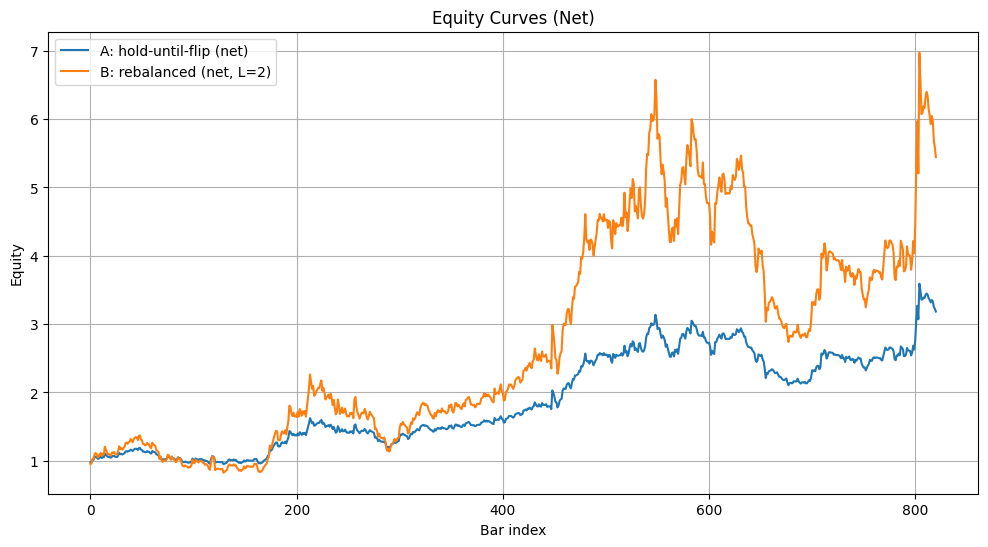

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# A net curve (log space)
eqA_log = A["equity_curve_net_taker"].to_numpy()
# Convert to equity
eqA = np.exp(eqA_log)

# B equity already in equity space
eqB = B["equity_B_L"].to_numpy()

plt.figure(figsize=(12,6))
plt.plot(eqA, label="A: hold-until-flip (net)")
plt.plot(eqB, label="B: rebalanced (net, L=2)")
plt.title("Equity Curves (Net)")
plt.xlabel("Bar index")
plt.ylabel("Equity")
plt.grid(True)
plt.legend()
plt.show()

In [30]:
print("Min equity B:", B["equity_B_L"].min())

Min equity B: 0.8258489370346069


In [31]:
import numpy as np

notional = B["notional_B"].to_numpy()
turnover = np.abs(np.diff(notional))

print("Mean turnover:", turnover.mean())
print("Max turnover:", turnover.max())

Mean turnover: 5.328478575625071
Max turnover: 25.4717378616333


In [32]:
print("Total fees paid (B):", B["fee_paid_B"].sum())

Total fees paid (B): 1.9671085583351626


In [33]:
import numpy as np

eq = B["equity_B_L"].to_numpy()
notional = B["notional_B"].to_numpy()

lev_eff = np.abs(notional) / np.maximum(eq, 1e-12)

print("Effective leverage (mean):", lev_eff.mean())
print("Effective leverage (median):", np.median(lev_eff))
print("Effective leverage (min/max):", lev_eff.min(), lev_eff.max())

Effective leverage (mean): 1.997485645216718
Effective leverage (median): 2.001431447190392
Effective leverage (min/max): 1.4931733168851922 2.385163765361685


In [34]:
eq_prev = eq[:-1]
d_notional = np.abs(np.diff(notional))

turnover_frac = d_notional / np.maximum(eq_prev, 1e-12)

print("Turnover frac (mean):", turnover_frac.mean())
print("Turnover frac (median):", np.median(turnover_frac))
print("Turnover frac (max):", turnover_frac.max())

Turnover frac (mean): 1.954583224642325
Turnover frac (median): 0.17573861008437597
Turnover frac (max): 4.385163765361685


In [35]:
fee = B["fee_paid_B"].to_numpy()

# only for bars where you actually traded
mask = d_notional > 1e-12

implied_fee_rate = fee[1:][mask] / d_notional[mask]  # fee paid divided by traded notional

print("Implied fee rate (mean):", implied_fee_rate.mean())
print("Implied fee rate (median):", np.median(implied_fee_rate))
print("Implied fee rate (min/max):", implied_fee_rate.min(), implied_fee_rate.max())

Implied fee rate (mean): 0.0004499999917986673
Implied fee rate (median): 0.00044999999127227
Implied fee rate (min/max): 0.00044999994553499554 0.0004500000361455634


In [36]:
def simulate_hold_until_flip_leverage(model_trades, L, taker_fee):
    s = model_trades["position"].to_numpy()
    y = model_trades["y_true"].to_numpy()
    r = np.exp(y) - 1.0

    n = len(r)

    E = np.zeros(n)
    q = np.zeros(n)
    fee_paid = np.zeros(n)

    E_prev = 1.0
    q_prev = 0.0
    s_prev = 0

    for t in range(n):

        # If first bar or signal changed → close & reopen
        if t == 0 or s[t] != s_prev:
            # Close old position
            turnover = abs(q_prev)

            # Open new position
            q_t = s[t] * L * E_prev
            turnover += abs(q_t)

            fee_t = taker_fee * turnover
        else:
            # Keep same notional
            q_t = q_prev
            fee_t = 0.0

        pnl = q_t * r[t]
        E_t = E_prev + pnl - fee_t

        E[t] = E_t
        q[t] = q_t
        fee_paid[t] = fee_t

        E_prev = E_t
        q_prev = q_t
        s_prev = s[t]

    return model_trades.with_columns([
        pl.Series("equity_A_L", E),
        pl.Series("fee_paid_A", fee_paid),
        pl.Series("notional_A", q),
        pl.Series("log_equity_A_L", np.log(np.maximum(E, 1e-12))),
    ])

In [37]:
A_L2 = simulate_hold_until_flip_leverage(model_trades, L=2.0, taker_fee=0.00045)

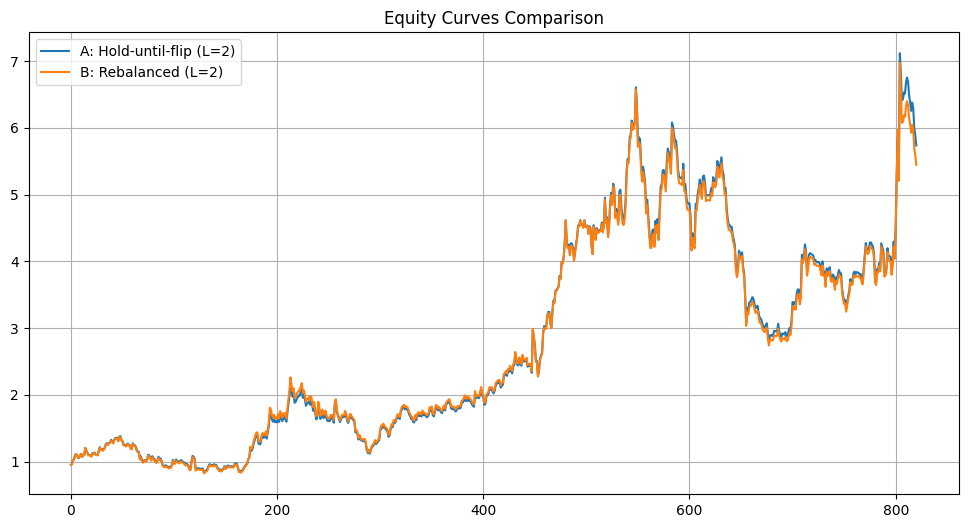

In [38]:
eqA = A_L2["equity_A_L"].to_numpy()
eqB = B["equity_B_L"].to_numpy()

plt.figure(figsize=(12,6))
plt.plot(eqA, label="A: Hold-until-flip (L=2)")
plt.plot(eqB, label="B: Rebalanced (L=2)")
plt.title("Equity Curves Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [39]:
print("Final equity A_L2:", A_L2["equity_A_L"][-1])
print("Final equity B_L2:", B["equity_B_L"][-1])

print("Total fees A_L2:", A_L2["fee_paid_A"].sum())
print("Total fees B_L2:", B["fee_paid_B"].sum())

Final equity A_L2: 5.735166072845459
Final equity B_L2: 5.445436477661133
Total fees A_L2: 1.9370570573955774
Total fees B_L2: 1.9671085583351626


In [40]:
eqA = A_L2["equity_A_L"].to_numpy()
notA = A_L2["notional_A"].to_numpy()

levA = np.abs(notA) / np.maximum(eqA, 1e-12)

print("A leverage min/max:", levA.min(), levA.max())

A leverage min/max: 1.4084754364173189 2.385163631853867


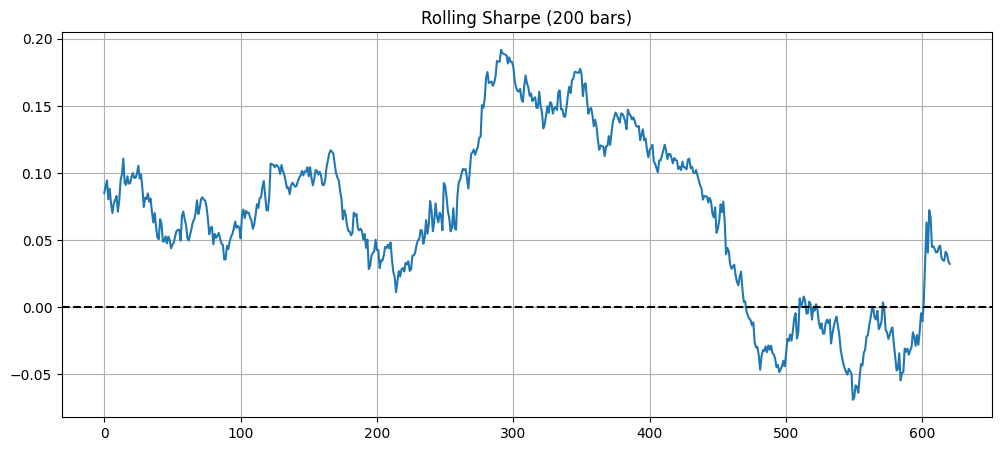

Min rolling Sharpe: -0.06901927394791459
Max rolling Sharpe: 0.19187546064441915


In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Use unlevered net log returns for structural test
r = A["trade_log_return_net_taker"].to_numpy()

window = 200
rolling_sharpe = []

for i in range(len(r) - window):
    sub = r[i:i+window]
    mu = sub.mean()
    sigma = sub.std(ddof=1)
    sharpe = mu / sigma if sigma > 0 else 0
    rolling_sharpe.append(sharpe)

plt.figure(figsize=(12,5))
plt.plot(rolling_sharpe)
plt.axhline(0, color='black', linestyle='--')
plt.title("Rolling Sharpe (200 bars)")
plt.grid(True)
plt.show()

print("Min rolling Sharpe:", np.min(rolling_sharpe))
print("Max rolling Sharpe:", np.max(rolling_sharpe))

In [42]:
window = 200
cum_returns = []

for i in range(len(r) - window):
    sub = r[i:i+window]
    cum = np.sum(sub)
    cum_returns.append(cum)

worst_window = np.min(cum_returns)
best_window = np.max(cum_returns)

print("Worst 200-bar log return:", worst_window)
print("Best 200-bar log return:", best_window)
print("Worst 200-bar equity multiple:", np.exp(worst_window))

Worst 200-bar log return: -0.25856081845563655
Best 200-bar log return: 0.733528550134955
Worst 200-bar equity multiple: 0.7721620679166149


In [43]:
r_L2 = np.diff(np.log(A_L2["equity_A_L"].to_numpy()))

window = 200
cum_L2 = []

for i in range(len(r_L2) - window):
    sub = r_L2[i:i+window]
    cum_L2.append(np.sum(sub))

worst_L2 = np.min(cum_L2)
print("Worst 200-bar L=2 log return:", worst_L2)
print("Worst 200-bar L=2 equity multiple:", np.exp(worst_L2))

Worst 200-bar L=2 log return: -0.6086385141078292
Worst 200-bar L=2 equity multiple: 0.5440911374353589


# Validation Summary — Strategy A vs Strategy B (L = 2)

## Objective

Compare two leveraged execution styles applied to the same signal:

- **Strategy A:** Hold-until-flip (constant notional, no rebalancing)
- **Strategy B:** Constant leverage (rebalanced every bar)

Both use:
- Taker fee = 0.00045
- Leverage L = 2

---

## Results Overview

### Final Equity

| Strategy | Final Equity |
|-----------|--------------|
| A (no rebalance, L=2) | 5.735 |
| B (rebalanced, L=2) | 5.445 |

Strategy A slightly outperforms.

---

### Total Fees Paid

| Strategy | Total Fees |
|-----------|------------|
| A | 1.937 |
| B | 1.967 |

Fees are very similar, slightly higher for B due to rebalancing turnover.

---

### Leverage Behavior

**Strategy A (no rebalance):**
- Effective leverage range: 1.41 – 2.39
- Leverage drifts:
  - Decreases after gains
  - Increases after losses

**Strategy B (rebalanced):**
- Leverage remains ~2 consistently

Conclusion: Leverage drift in Strategy A is mild and controlled.

---

## Structural Stability (Unlevered)

### Rolling Sharpe (200 bars)

- Mostly positive
- Temporary deterioration phase
- Min rolling Sharpe ≈ -0.069
- Max rolling Sharpe ≈ 0.192

Interpretation:
- Edge is regime-dependent
- No catastrophic inversion
- Edge weakens but recovers

---

### Worst 200-Bar Window (Unlevered)

- Log return ≈ -0.259
- Equity multiple ≈ 0.772

Worst ~2-month period: **-22.8%**

Acceptable for crypto.

---

### Worst 200-Bar Window (L = 2)

- Log return ≈ -0.609
- Equity multiple ≈ 0.544

Worst ~2-month period at 2x leverage: **-45.6%**

Implication:
- Strategy survives
- But psychologically demanding
- Leverage significantly amplifies drawdowns

---

## Key Conclusions

1. The signal shows a real but moderate edge.
2. The difference between rebalanced and non-rebalanced leverage is second-order.
3. The dominant driver of performance is the signal edge, not the leverage mechanics.
4. At L = 2, worst-case drawdown approaches -46% over ~2 months.
5. Leverage must be chosen carefully relative to capital and psychological tolerance.

---

## Next Step

Compute empirical Kelly leverage and determine optimal live leverage level relative to risk tolerance.

shape: (10, 11)
┌───────────┬───────────┬───────────┬──────────┬───┬───────────┬──────────┬──────────┬─────────────┐
│ window_id ┆ start_idx ┆ train_len ┆ test_len ┆ … ┆ max_dd_B  ┆ final_A  ┆ final_B  ┆ mean_turnov │
│ ---       ┆ ---       ┆ ---       ┆ ---      ┆   ┆ ---       ┆ ---      ┆ ---      ┆ er_B        │
│ i64       ┆ i64       ┆ i64       ┆ i64      ┆   ┆ f64       ┆ f64      ┆ f64      ┆ ---         │
│           ┆           ┆           ┆          ┆   ┆           ┆          ┆          ┆ f64         │
╞═══════════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪══════════╪══════════╪═════════════╡
│ 0         ┆ 0         ┆ 1200      ┆ 200      ┆ … ┆ -0.754852 ┆ 0.268077 ┆ 0.243872 ┆ 2.11        │
│ 1         ┆ 200       ┆ 1200      ┆ 200      ┆ … ┆ -0.402432 ┆ 1.220917 ┆ 1.126814 ┆ 1.79        │
│ 2         ┆ 400       ┆ 1200      ┆ 200      ┆ … ┆ -0.298706 ┆ 2.535135 ┆ 2.352423 ┆ 1.67        │
│ 3         ┆ 600       ┆ 1200      ┆ 200      ┆ … ┆ -0.475398 ┆ 6.442743 ┆

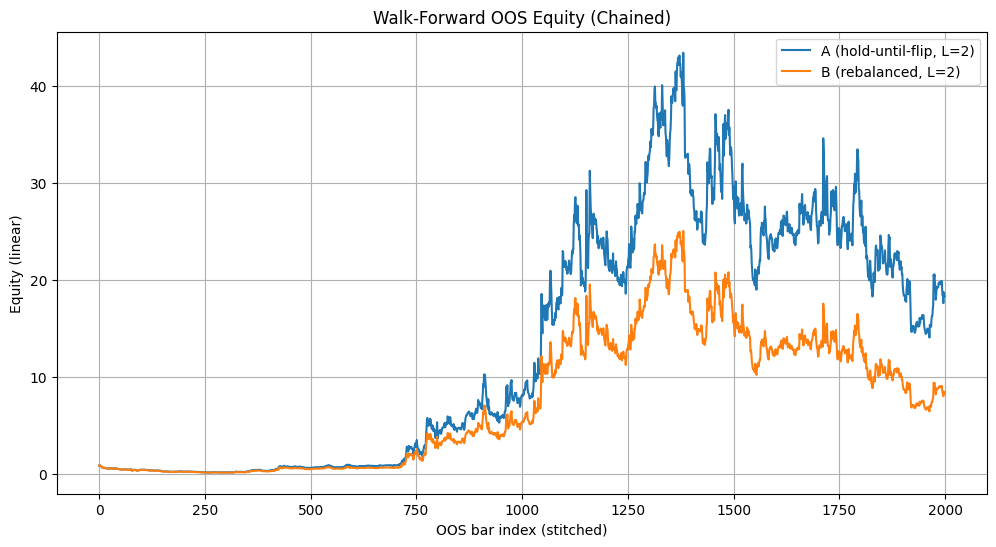

In [45]:
import numpy as np
import polars as pl
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# ----------------------------
# Walk-forward settings
# ----------------------------
features = ['close_log_return_lag_1','close_log_return_lag_2','close_log_return_lag_3','close_log_return_lag_5']
target = "close_log_return"

taker_fee = 0.00045
L = 2.0

no_epochs = 200
lr = 5e-4

# window sizes in bars (8h bars):
train_len = 1200   # ~400 days
test_len  = 200    # ~66 days
step_len  = 200    # rolling forward by 200 bars

# ----------------------------
# Helpers
# ----------------------------
def compute_t(x: np.ndarray) -> float:
    x = np.asarray(x, dtype=float)
    if len(x) < 2:
        return np.nan
    return x.mean() / (x.std(ddof=1) / np.sqrt(len(x)))

def max_drawdown_from_equity(equity: np.ndarray) -> float:
    # equity in linear space
    peak = np.maximum.accumulate(equity)
    dd = equity / peak - 1.0
    return float(dd.min())

def train_linear_model(X_train, y_train, input_dim, no_epochs=200, lr=5e-4):
    model = LinearModel(input_dim)
    # IMPORTANT for reproducibility / avoid weird init issues
    if hasattr(research, "init_weights"):
        model.apply(research.init_weights)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model.train()
    for _ in range(no_epochs):
        y_hat = model(X_train)
        loss = criterion(y_hat, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return model

def build_strategy_A_hold_until_flip(df: pl.DataFrame, taker_fee: float, L: float):
    """
    A: Hold-until-flip, but with leverage L applied to PnL (no rebalancing).
    Fee only when position flips (+1 <-> -1): round-trip.
    Equity computed in linear space:
        E_{t+1} = E_t * exp(L * r_t + fee_t)
    """
    roundtrip_fee_log = float(np.log(1 - 2 * taker_fee))

    dfA = (
        df
        .with_columns([
            pl.col("position").cast(pl.Int8).alias("pos"),
            pl.col("position").shift(1).cast(pl.Int8).alias("pos_prev"),
        ])
        .with_columns([
            (pl.col("pos") != pl.col("pos_prev")).fill_null(True).alias("is_flip"),
        ])
        .with_columns([
            pl.when(pl.col("is_flip"))
              .then(pl.lit(roundtrip_fee_log))
              .otherwise(pl.lit(0.0))
              .alias("fee_log"),
        ])
        .with_columns([
            # leveraged log-return contribution (no rebalancing, constant notional approximation)
            (pl.lit(L) * pl.col("trade_log_return") + pl.col("fee_log")).alias("log_ret_net"),
        ])
    )

    log_ret = dfA["log_ret_net"].to_numpy()
    eq = np.exp(np.cumsum(log_ret))  # start at 1.0

    return dfA.with_columns([
        pl.Series("equity_A", eq),
        pl.Series("log_equity_A", np.log(eq)),
        pl.Series("log_ret_A", log_ret),
    ])

def build_strategy_B_rebalanced(df: pl.DataFrame, taker_fee: float, L: float):
    """
    B: Constant leverage L rebalanced every bar (trade every bar).
    Fee charged each bar based on turnover:
      turnover_frac_t = |w_t - w_{t-1}|
      fee_cost = taker_fee * turnover_frac_t
    where w_t in {-L, +L}.
    Equity:
      E_{t+1} = E_t * exp(w_t * r_t) * (1 - fee_cost)
    """
    pos = df["position"].to_numpy().astype(float)   # +/-1
    r   = df["y_true"].to_numpy().astype(float)     # realized return (log return)

    w = L * pos                                     # target exposure each bar: +/-L
    w_prev = np.concatenate([[0.0], w[:-1]])         # start flat before first bar
    turnover_frac = np.abs(w - w_prev)               # |Δw|
    fee_cost = taker_fee * turnover_frac             # fraction of equity paid as fee

    # equity recursion
    eq = np.empty(len(r), dtype=float)
    eq[0] = 1.0
    for t in range(len(r)):
        gross_mult = np.exp(w[t] * r[t])
        net_mult = gross_mult * (1.0 - fee_cost[t])
        eq[t] = (eq[t-1] if t > 0 else 1.0) * net_mult

    log_ret = np.log(eq[1:] / eq[:-1])
    log_ret = np.concatenate([[np.log(eq[0])], log_ret])  # align length

    return df.with_columns([
        pl.Series("equity_B", eq),
        pl.Series("log_equity_B", np.log(eq)),
        pl.Series("turnover_frac", turnover_frac),
        pl.Series("fee_frac", fee_cost),
        pl.Series("log_ret_B", log_ret),
    ])

# ----------------------------
# Data prep
# ----------------------------
df = ts.drop_nulls(subset=features + [target]).select(features + [target])

N = df.height
assert N >= train_len + test_len, "Not enough data for your chosen window sizes."

# ----------------------------
# Walk-forward loop
# ----------------------------
windows = []
stitched = []

start = 0
w_id = 0

while start + train_len + test_len <= N:
    train = df.slice(start, train_len)
    test  = df.slice(start + train_len, test_len)

    # tensors
    X_train = torch.tensor(train.select(features).to_numpy(), dtype=torch.float32)
    y_train = torch.tensor(train.select([target]).to_numpy(), dtype=torch.float32)

    X_test  = torch.tensor(test.select(features).to_numpy(), dtype=torch.float32)
    y_test  = test.select([target]).to_numpy().reshape(-1).astype(np.float32)

    # train
    model = train_linear_model(X_train, y_train, input_dim=len(features), no_epochs=no_epochs, lr=lr)

    # predict OOS
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test).numpy().reshape(-1).astype(np.float32)

    # build base trades df (OOS only)
    oos = pl.DataFrame({
        "window_id": np.full(len(y_pred), w_id, dtype=int),
        "bar_in_window": np.arange(len(y_pred), dtype=int),
        "y_pred": y_pred,
        "y_true": y_test,
    }).with_columns([
        pl.col("y_pred").sign().alias("position"),
        (pl.col("y_pred").sign() * pl.col("y_true")).alias("trade_log_return"),
    ])

    # strategy A + B
    oosA = build_strategy_A_hold_until_flip(oos, taker_fee=taker_fee, L=L)
    oosAB = build_strategy_B_rebalanced(oosA, taker_fee=taker_fee, L=L)

    # window metrics (use per-bar log returns)
    rA = oosAB["log_ret_A"].to_numpy()
    rB = oosAB["log_ret_B"].to_numpy()

    eqA = oosAB["equity_A"].to_numpy()
    eqB = oosAB["equity_B"].to_numpy()

    windows.append({
        "window_id": w_id,
        "start_idx": start,
        "train_len": train_len,
        "test_len": test_len,
        "t_A": compute_t(rA),
        "t_B": compute_t(rB),
        "max_dd_A": max_drawdown_from_equity(eqA),
        "max_dd_B": max_drawdown_from_equity(eqB),
        "final_A": float(eqA[-1]),
        "final_B": float(eqB[-1]),
        "mean_turnover_B": float(oosAB["turnover_frac"].mean()),
    })

    stitched.append(oosAB)

    start += step_len
    w_id += 1

wf_metrics = pl.DataFrame(windows)
wf_oos = pl.concat(stitched, how="vertical")

print(wf_metrics)

# ----------------------------
# Stitch equity across windows (reset to 1 each window -> chain them)
# ----------------------------
# Convert per-window equity into a single chained curve:
wf_oos = wf_oos.with_columns([
    pl.col("equity_A").shift(1).over("window_id").alias("eqA_prev"),
    pl.col("equity_B").shift(1).over("window_id").alias("eqB_prev"),
])

# Build per-bar multipliers within each window and chain across windows
wf_oos = wf_oos.with_columns([
    (pl.col("equity_A") / pl.col("eqA_prev")).fill_null(pl.col("equity_A")).alias("mult_A"),
    (pl.col("equity_B") / pl.col("eqB_prev")).fill_null(pl.col("equity_B")).alias("mult_B"),
]).drop(["eqA_prev", "eqB_prev"])

mult_A = wf_oos["mult_A"].to_numpy()
mult_B = wf_oos["mult_B"].to_numpy()

chain_A = np.cumprod(mult_A)
chain_B = np.cumprod(mult_B)

wf_oos = wf_oos.with_columns([
    pl.Series("equity_A_chained", chain_A),
    pl.Series("equity_B_chained", chain_B),
])

# ----------------------------
# Plot chained OOS equity
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(wf_oos["equity_A_chained"].to_numpy(), label="A (hold-until-flip, L=2)")
plt.plot(wf_oos["equity_B_chained"].to_numpy(), label="B (rebalanced, L=2)")
plt.title("Walk-Forward OOS Equity (Chained)")
plt.xlabel("OOS bar index (stitched)")
plt.ylabel("Equity (linear)")
plt.grid(True)
plt.legend()
plt.show()

In [46]:
wf_metrics.select([
    pl.col("final_A").mean().alias("mean_final_A"),
    pl.col("final_A").median().alias("median_final_A"),
])

mean_final_A,median_final_A
f64,f64
1.880229,1.217434


In [47]:
print("Winning windows:",
      (wf_metrics["final_A"] > 1).mean())

Winning windows: 0.7


In [ ]:
shape: (1, 2)
mean_final_A	median_final_A
f64	f64
1.880229	1.217434


Winning windows: 0.7

In [48]:
# ---- 1) what dataframe are we using? ----
# If you already have df = ts.drop_nulls(), keep it.
# Otherwise, set it now:
df = ts.drop_nulls()

print("df shape:", df.shape)
print("df columns:", df.columns)

# ---- 2) show current model settings ----
print("features:", features)
print("target:", target)

# ---- 3) check datetime presence (important for stitching plots) ----
print("Has datetime?", "datetime" in df.columns)

# ---- 4) print any WFV-ish variables you may already have ----
for name in ["annualized_rate", "taker_fee", "forecast_horizon", "time_interval"]:
    if name in globals():
        print(f"{name}:", globals()[name])

df shape: (3284, 12)
df columns: ['datetime', 'open', 'high', 'low', 'close', 'close_log_return', 'close_log_return_lag_1', 'close_log_return_lag_2', 'close_log_return_lag_3', 'close_log_return_lag_4', 'close_log_return_lag_5', 'close_log_return_lag_6']
features: ['close_log_return_lag_1', 'close_log_return_lag_2', 'close_log_return_lag_3', 'close_log_return_lag_5']
target: close_log_return
Has datetime? True
annualized_rate: 33.090784215548595
taker_fee: 0.00045
forecast_horizon: 1
time_interval: 8h


fold_stats:
shape: (10, 11)
┌───────────┬───────────┬───────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ window_id ┆ start_idx ┆ train_len ┆ test_len ┆ … ┆ sharpe_ne ┆ final_equ ┆ max_dd_lo ┆ flip_rate │
│ ---       ┆ ---       ┆ ---       ┆ ---      ┆   ┆ t         ┆ ity_net   ┆ g_net     ┆ ---       │
│ i64       ┆ i64       ┆ i64       ┆ i64      ┆   ┆ ---       ┆ ---       ┆ ---       ┆ f64       │
│           ┆           ┆           ┆          ┆   ┆ f64       ┆ f64       ┆ f64       ┆           │
╞═══════════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0         ┆ 0         ┆ 1200      ┆ 200      ┆ … ┆ -0.937931 ┆ 0.53481   ┆ -0.70291  ┆ 0.53      │
│ 1         ┆ 200       ┆ 1200      ┆ 200      ┆ … ┆ 0.138992  ┆ 1.092051  ┆ -0.251273 ┆ 0.455     │
│ 2         ┆ 400       ┆ 1200      ┆ 200      ┆ … ┆ 0.478712  ┆ 1.483872  ┆ -0.177402 ┆ 0.425     │
│ 3         ┆ 600       ┆ 1200      ┆ 200      ┆ … ┆ 0.554509  

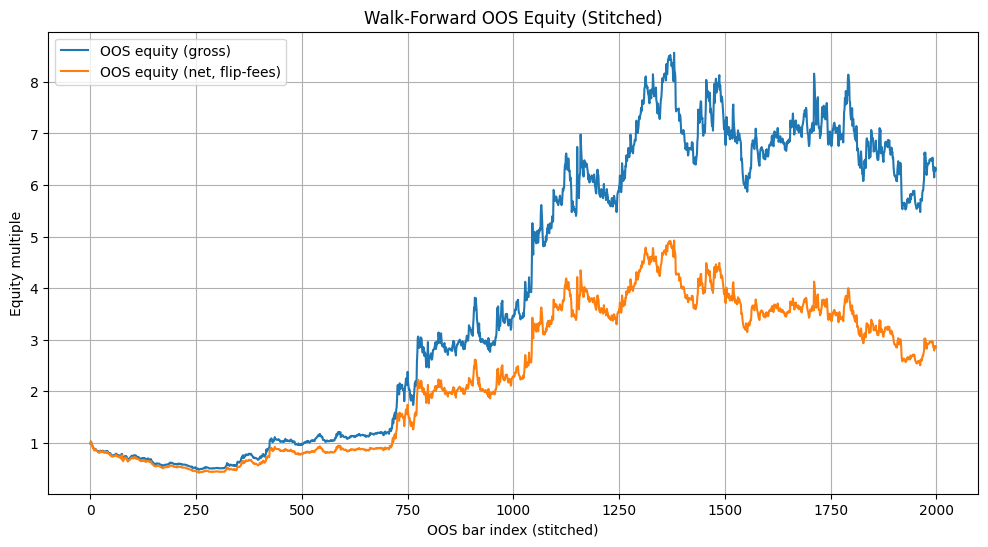

In [57]:
# ============================
# WALK-FORWARD VALIDATION (ADA-style, stitched OOS)
# - Rolling window
# - Train model each fold
# - Predict on next TEST_LEN bars
# - Stitch OOS trades + equity
# ============================

import numpy as np
import polars as pl
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# ----------------------------
# 0) Settings (chosen to match your previous chained-WFV style)
# ----------------------------
TRAIN_LEN = 1200
TEST_LEN  = 200
STEP      = 200          # usually = TEST_LEN
NO_EPOCHS = 200
LR        = 5e-4

APPLY_FEES = True
roundtrip_fee_log = float(np.log(1 - 2 * taker_fee))  # same convention as notebook

# ----------------------------
# 1) Helpers
# ----------------------------
def compute_t(x: np.ndarray) -> float:
    x = np.asarray(x, dtype=float)
    if len(x) < 2:
        return np.nan
    return x.mean() / (x.std(ddof=1) / np.sqrt(len(x)))

def ann_sharpe(mean_bar: float, std_bar: float, annualized_rate: float) -> float:
    if std_bar == 0 or np.isnan(std_bar):
        return np.nan
    return (mean_bar / std_bar) * np.sqrt(annualized_rate)

# ----------------------------
# 2) Walk-forward loop
# ----------------------------
df_wf = df  # you already set df = ts.drop_nulls()
N = df_wf.height

oos_chunks = []
fold_rows = []

window_id = 0
for start in range(0, N - TRAIN_LEN - TEST_LEN + 1, STEP):
    train_df = df_wf.slice(start, TRAIN_LEN)
    test_df  = df_wf.slice(start + TRAIN_LEN, TEST_LEN)

    # tensors
    X_train = torch.tensor(train_df.select(features).to_numpy(), dtype=torch.float32)
    y_train = torch.tensor(train_df.select([target]).to_numpy(), dtype=torch.float32).reshape(-1, 1)

    X_test  = torch.tensor(test_df.select(features).to_numpy(), dtype=torch.float32)
    y_test  = torch.tensor(test_df.select([target]).to_numpy(), dtype=torch.float32).reshape(-1, 1)

    # model
    model = LinearModel(len(features))
    model.apply(research.init_weights)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)

    # train
    model.train()
    for _ in range(NO_EPOCHS):
        y_hat = model(X_train)
        loss = criterion(y_hat, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # predict
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test).detach().cpu().numpy().reshape(-1)
    y_true = y_test.detach().cpu().numpy().reshape(-1)

    # build OOS trades for this fold
    fold_trades = pl.DataFrame({
        "datetime": test_df["datetime"].to_numpy(),
        "y_pred":   y_pred.astype(np.float32),
        "y_true":   y_true.astype(np.float32),
        "window_id": np.int64(window_id),
        "start_idx": np.int64(start),
    })
    fold_trades = fold_trades.with_columns(
        pl.col("y_pred").sign().alias("position")
    )

    fold_trades = fold_trades.with_columns([
        (pl.col("y_pred").sign() == pl.col("y_true").sign()).alias("is_won"),
        (pl.col("position") * pl.col("y_true")).alias("trade_log_return"),
    ])

    # fees on flips (within the fold, we’ll re-stitch globally later too)
    if APPLY_FEES:
        fold_trades = (
            fold_trades
            .with_columns([
                pl.col("position").cast(pl.Int8).alias("pos"),
                pl.col("position").shift(1).cast(pl.Int8).alias("pos_prev"),
            ])
            .with_columns([
                (pl.col("pos") != pl.col("pos_prev")).fill_null(True).alias("is_flip"),
            ])
            .with_columns([
                pl.when(pl.col("is_flip"))
                  .then(pl.lit(roundtrip_fee_log))
                  .otherwise(pl.lit(0.0))
                  .alias("fee_log"),
            ])
            .with_columns([
                (pl.col("trade_log_return") + pl.col("fee_log")).alias("trade_log_return_net"),
            ])
        )
    else:
        fold_trades = fold_trades.with_columns([
            pl.lit(0.0).alias("fee_log"),
            pl.col("trade_log_return").alias("trade_log_return_net"),
            pl.lit(False).alias("is_flip"),
        ])

    # fold stats (net)
    r_net = fold_trades["trade_log_return_net"].to_numpy()
    mean_bar = float(np.mean(r_net))
    std_bar  = float(np.std(r_net, ddof=1)) if len(r_net) > 1 else np.nan
    tstat    = float(compute_t(r_net))
    sharpe   = float(ann_sharpe(mean_bar, std_bar, annualized_rate))
    final_eq = float(np.exp(np.sum(r_net)))  # equity multiple from log-returns
    max_dd   = float(np.min(np.cumsum(r_net) - np.maximum.accumulate(np.cumsum(r_net))))

    fold_rows.append({
        "window_id": window_id,
        "start_idx": start,
        "train_len": TRAIN_LEN,
        "test_len": TEST_LEN,
        "mean_bar_net": mean_bar,
        "std_bar_net": std_bar,
        "tstat_net": tstat,
        "sharpe_net": sharpe,
        "final_equity_net": final_eq,
        "max_dd_log_net": max_dd,
        "flip_rate": float(fold_trades["is_flip"].mean()),
    })

    oos_chunks.append(fold_trades)
    window_id += 1

# ----------------------------
# 3) Stitch all OOS folds (chained equity)
# ----------------------------
oos_trades = pl.concat(oos_chunks, how="vertical")

# IMPORTANT: re-compute flips globally after concatenation (fold boundaries matter)
oos_trades = (
    oos_trades
    .with_columns([
        pl.col("position").cast(pl.Int8).alias("pos_g"),
        pl.col("position").shift(1).cast(pl.Int8).alias("pos_prev_g"),
    ])
    .with_columns(
        (pl.col("pos_g") != pl.col("pos_prev_g")).fill_null(True).alias("is_flip_g")
    )
    .with_columns(
        pl.when(pl.col("is_flip_g"))
          .then(pl.lit(roundtrip_fee_log))
          .otherwise(pl.lit(0.0))
          .alias("fee_log_g")
    )
    .with_columns([
        (pl.col("trade_log_return") + pl.col("fee_log_g")).alias("trade_log_return_net_g"),
        pl.col("trade_log_return").cum_sum().alias("equity_log_gross"),
    ])
    .with_columns(
        pl.col("trade_log_return_net_g").cum_sum().alias("equity_log_net")
    )
)

fold_stats = pl.DataFrame(fold_rows)

print("fold_stats:")
print(fold_stats)

print("\nstitched OOS summary (NET):")
r_net_all = oos_trades["trade_log_return_net_g"].to_numpy()
print("N:", len(r_net_all))
print("mean/bar:", float(np.mean(r_net_all)))
print("std/bar:", float(np.std(r_net_all, ddof=1)))
print("t-stat:", float(compute_t(r_net_all)))
print("sharpe:", float(ann_sharpe(float(np.mean(r_net_all)), float(np.std(r_net_all, ddof=1)), annualized_rate)))
print("final equity multiple (net):", float(np.exp(np.sum(r_net_all))))

# ----------------------------
# 4) Plot stitched OOS equity (static)
# ----------------------------
eq_gross = np.exp(oos_trades["equity_log_gross"].to_numpy())
eq_net   = np.exp(oos_trades["equity_log_net"].to_numpy())

plt.figure(figsize=(12,6))
plt.plot(eq_gross, label="OOS equity (gross)")
plt.plot(eq_net,   label="OOS equity (net, flip-fees)")
plt.title("Walk-Forward OOS Equity (Stitched)")
plt.xlabel("OOS bar index (stitched)")
plt.ylabel("Equity multiple")
plt.grid(True)
plt.legend()
plt.show()

In [58]:
print("Mean final equity:", fold_stats["final_equity_net"].mean())
print("Median final equity:", fold_stats["final_equity_net"].median())
print("Winning folds:", (fold_stats["final_equity_net"] > 1).mean())
print("Mean t-stat:", fold_stats["tstat_net"].mean())
print("Mean Sharpe:", fold_stats["sharpe_net"].mean())

Mean final equity: 1.1882323856067851
Median final equity: 1.0632550892328165
Winning folds: 0.7
Mean t-stat: 0.12039169657297688
Mean Sharpe: 0.04897055957017413


In [59]:
fold_stats.write_csv("fold_stats.csv")

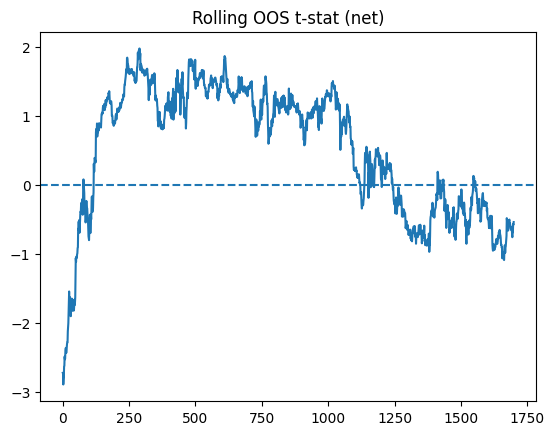

In [60]:
window = 300
r = oos_trades["trade_log_return_net_g"].to_numpy()

roll_t = []
for i in range(window, len(r)):
    x = r[i-window:i]
    roll_t.append(compute_t(x))

plt.plot(roll_t)
plt.axhline(0, linestyle="--")
plt.title("Rolling OOS t-stat (net)")
plt.show()

In [61]:
acc = (oos_trades["position"].to_numpy() * oos_trades["y_true"].to_numpy()) > 0
print("Directional accuracy OOS:", acc.mean())

Directional accuracy OOS: 0.479


In [62]:
print("Mean EV across folds:", fold_stats["mean_bar_net"].mean())
print("Median EV across folds:", fold_stats["mean_bar_net"].median())
print("Positive EV folds:", (fold_stats["mean_bar_net"] > 0).mean())

Mean EV across folds: 0.0005236424129189002
Median EV across folds: 0.0003048408496015121
Positive EV folds: 0.7


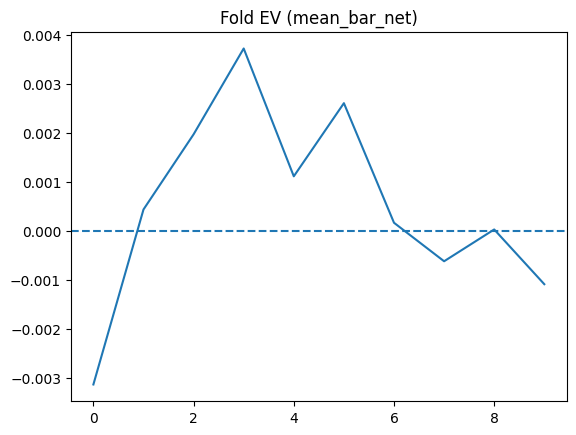

In [63]:
plt.plot(fold_stats["mean_bar_net"].to_numpy())
plt.axhline(0, linestyle="--")
plt.title("Fold EV (mean_bar_net)")
plt.show()

In [64]:
import numpy as np

evs = fold_stats["mean_bar_net"].to_numpy()

print("EV mean:", evs.mean())
print("EV std:", evs.std())
print("EV / std ratio:", evs.mean() / evs.std())

EV mean: 0.0005236424129189
EV std: 0.0018612897904988729
EV / std ratio: 0.28133309256402816


In [65]:
recent_folds = fold_stats.filter(pl.col("window_id") >= 6)

print("Recent mean EV:", recent_folds["mean_bar_net"].mean())
print("Recent positive rate:", (recent_folds["mean_bar_net"] > 0).mean())

Recent mean EV: -0.00037439956715151036
Recent positive rate: 0.5


In [52]:
df_wf.columns

['datetime',
 'open',
 'high',
 'low',
 'close',
 'close_log_return',
 'close_log_return_lag_1',
 'close_log_return_lag_2',
 'close_log_return_lag_3',
 'close_log_return_lag_4',
 'close_log_return_lag_5',
 'close_log_return_lag_6']

In [53]:
test_df.select(["datetime"]).head(2)

datetime
datetime[μs]
2024-03-19 08:00:00
2024-03-19 16:00:00


In [54]:
len(y_pred), len(y_true), test_df.height

(200, 200, 200)

In [67]:
oos_trades.columns

['datetime',
 'y_pred',
 'y_true',
 'window_id',
 'start_idx',
 'position',
 'is_won',
 'trade_log_return',
 'pos',
 'pos_prev',
 'is_flip',
 'fee_log',
 'trade_log_return_net',
 'pos_g',
 'pos_prev_g',
 'is_flip_g',
 'fee_log_g',
 'trade_log_return_net_g',
 'equity_log_gross',
 'equity_log_net']

shape: (9, 8)
┌──────────┬─────────────┬───────────┬──────────┬──────────┬────────────┬─────────────┬────────────┐
│ tau      ┆ in_market_r ┆ flip_rate ┆ mean_net ┆ t_net    ┆ sharpe_net ┆ final_eq_ne ┆ max_dd_log │
│ ---      ┆ ate         ┆ ---       ┆ ---      ┆ ---      ┆ ---        ┆ t           ┆ _net       │
│ f64      ┆ ---         ┆ f64       ┆ f64      ┆ f64      ┆ f64        ┆ ---         ┆ ---        │
│          ┆ f64         ┆           ┆          ┆          ┆            ┆ f64         ┆ f64        │
╞══════════╪═════════════╪═══════════╪══════════╪══════════╪════════════╪═════════════╪════════════╡
│ 0.035979 ┆ 0.2         ┆ 0.2595    ┆ 0.000635 ┆ 1.706767 ┆ 0.21954    ┆ 3.56409     ┆ -0.205992  │
│ 0.026556 ┆ 0.3         ┆ 0.3755    ┆ 0.000681 ┆ 1.677896 ┆ 0.215826   ┆ 3.904179    ┆ -0.306439  │
│ 0.016118 ┆ 0.5         ┆ 0.523     ┆ 0.000642 ┆ 1.383383 ┆ 0.177943   ┆ 3.612102    ┆ -0.393809  │
│ 0.008449 ┆ 0.7         ┆ 0.5885    ┆ 0.000676 ┆ 1.316418 ┆ 0.169329   ┆ 3.8

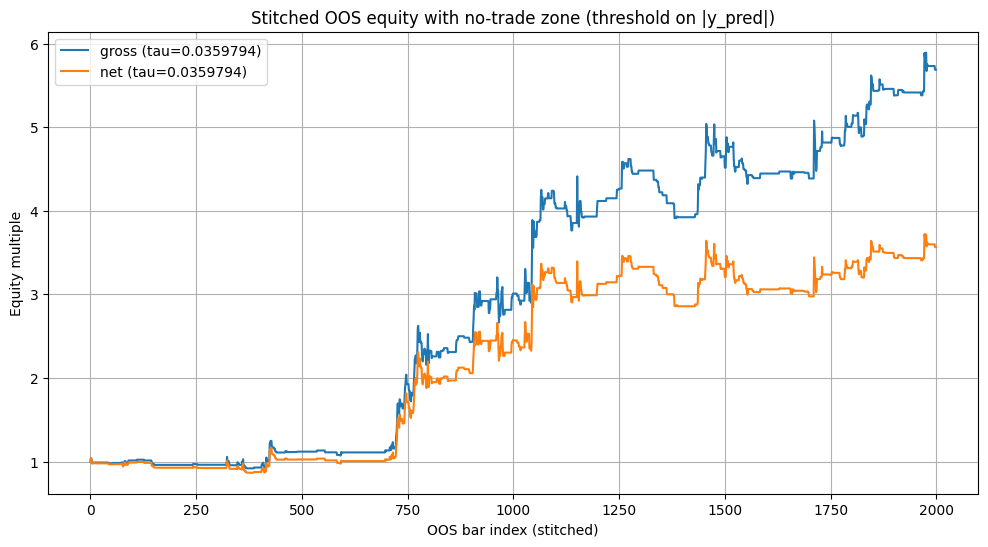


Best tau summary:
{'N': 2000, 'in_market_rate': 0.2, 'flip_rate': 0.2595, 'mean_gross': 0.0008691095863468945, 'mean_net': 0.000635454394422799, 't_gross': 2.3325214873494766, 't_net': 1.7067672003387186, 'sharpe_gross': 0.30002966416233157, 'sharpe_net': 0.2195395755442845, 'final_eq_gross': 5.687206745147705, 'final_eq_net': 3.564090096339474, 'max_dd_log_gross': -0.19518673419952393, 'max_dd_log_net': -0.20599158962325737}


In [69]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

# ----------------------------
# Threshold / no-trade zone on stitched OOS
# ----------------------------
# Uses oos_trades with columns you listed.
# Trades only when |y_pred| > tau; otherwise position = 0 (flat).
# Fees: taker roundtrip fee charged ONLY when position changes (including into/out of flat).

roundtrip_fee_log = float(np.log(1 - 2 * taker_fee))

def compute_t(x: np.ndarray) -> float:
    x = np.asarray(x, dtype=float)
    if len(x) < 2:
        return np.nan
    s = x.std(ddof=1)
    if s == 0 or np.isnan(s):
        return np.nan
    return x.mean() / (s / np.sqrt(len(x)))

def ann_sharpe(mean_bar: float, std_bar: float, annualized_rate: float) -> float:
    if std_bar == 0 or np.isnan(std_bar):
        return np.nan
    return (mean_bar / std_bar) * np.sqrt(annualized_rate)

def max_dd_from_log_eq(eq_log: np.ndarray) -> float:
    peak = np.maximum.accumulate(eq_log)
    dd = eq_log - peak
    return float(dd.min())

def apply_threshold_and_fees(oos_trades: pl.DataFrame, tau: float) -> pl.DataFrame:
    out = (
        oos_trades
        .select(["datetime", "y_pred", "y_true", "trade_log_return"])
        .with_columns(
            pl.when(pl.col("y_pred").abs() > pl.lit(tau))
              .then(pl.col("y_pred").sign())
              .otherwise(pl.lit(0.0))
              .alias("position_thr")
        )
        .with_columns(
            (pl.col("position_thr") * pl.col("y_true")).alias("trade_log_return_thr")
        )
        .with_columns([
            pl.col("position_thr").cast(pl.Int8).alias("pos_thr"),
            pl.col("position_thr").shift(1).cast(pl.Int8).alias("pos_thr_prev"),
        ])
        .with_columns(
            (pl.col("pos_thr") != pl.col("pos_thr_prev")).fill_null(True).alias("is_flip_thr")
        )
        .with_columns(
            pl.when(pl.col("is_flip_thr"))
              .then(pl.lit(roundtrip_fee_log))
              .otherwise(pl.lit(0.0))
              .alias("fee_log_thr")
        )
        # 1) create net return first
        .with_columns(
            (pl.col("trade_log_return_thr") + pl.col("fee_log_thr")).alias("trade_log_return_net_thr")
        )
        # 2) then cum-sum it in a separate call
        .with_columns([
            pl.col("trade_log_return_thr").cum_sum().alias("equity_log_gross_thr"),
            pl.col("trade_log_return_net_thr").cum_sum().alias("equity_log_net_thr"),
        ])
    )
    return out

def summarize_trades(tr: pl.DataFrame) -> dict:
    r_g = tr["trade_log_return_thr"].to_numpy()
    r_n = tr["trade_log_return_net_thr"].to_numpy()
    eqlog_g = tr["equity_log_gross_thr"].to_numpy()
    eqlog_n = tr["equity_log_net_thr"].to_numpy()

    mean_g, std_g = float(r_g.mean()), float(r_g.std(ddof=1))
    mean_n, std_n = float(r_n.mean()), float(r_n.std(ddof=1))
    t_g, t_n = compute_t(r_g), compute_t(r_n)
    sh_g = ann_sharpe(mean_g, std_g, annualized_rate)
    sh_n = ann_sharpe(mean_n, std_n, annualized_rate)

    return {
        "N": int(len(r_g)),
        "in_market_rate": float((tr["position_thr"] != 0).mean()),
        "flip_rate": float(tr["is_flip_thr"].mean()),
        "mean_gross": mean_g,
        "mean_net": mean_n,
        "t_gross": float(t_g),
        "t_net": float(t_n),
        "sharpe_gross": float(sh_g),
        "sharpe_net": float(sh_n),
        "final_eq_gross": float(np.exp(eqlog_g[-1])) if len(eqlog_g) else np.nan,
        "final_eq_net": float(np.exp(eqlog_n[-1])) if len(eqlog_n) else np.nan,
        "max_dd_log_gross": max_dd_from_log_eq(eqlog_g) if len(eqlog_g) else np.nan,
        "max_dd_log_net": max_dd_from_log_eq(eqlog_n) if len(eqlog_n) else np.nan,
    }

# ----------------------------
# 1) Choose tau grid (data-driven)
# ----------------------------
abs_pred = oos_trades["y_pred"].abs().to_numpy()
# percentiles are usually a good way to define meaningful thresholds
taus = np.quantile(abs_pred, [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80])

rows = []
cache = {}

for tau in taus:
    tr_tau = apply_threshold_and_fees(oos_trades, float(tau))
    cache[float(tau)] = tr_tau
    s = summarize_trades(tr_tau)
    s["tau"] = float(tau)
    rows.append(s)

res = pl.DataFrame(rows).sort("sharpe_net", descending=True)

print(res.select([
    "tau",
    "in_market_rate",
    "flip_rate",
    "mean_net",
    "t_net",
    "sharpe_net",
    "final_eq_net",
    "max_dd_log_net",
]).head(10))

# ----------------------------
# 2) Plot best tau equity curves
# ----------------------------
best_tau = float(res[0, "tau"])
best_tr = cache[best_tau]

eq_g = np.exp(best_tr["equity_log_gross_thr"].to_numpy())
eq_n = np.exp(best_tr["equity_log_net_thr"].to_numpy())

plt.figure(figsize=(12,6))
plt.plot(eq_g, label=f"gross (tau={best_tau:.6g})")
plt.plot(eq_n, label=f"net (tau={best_tau:.6g})")
plt.title("Stitched OOS equity with no-trade zone (threshold on |y_pred|)")
plt.xlabel("OOS bar index (stitched)")
plt.ylabel("Equity multiple")
plt.grid(True)
plt.legend()
plt.show()

print("\nBest tau summary:")
print(summarize_trades(best_tr))

In [73]:
best_tr.write_csv(f"best_tr_{best_tau}.csv")

In [74]:
fold_stats.write_csv("summarize_trades(best_tr).csv")

In [71]:
best_tau = float(res[0, "tau"])
best_tr = cache[best_tau]

# 1) Distribution of positions
print(
    best_tr
    .group_by("position_thr")
    .count()
    .sort("position_thr")
)

# 2) Core diagnostics
print(
    best_tr.select([
        pl.col("is_flip_thr").mean().alias("flip_rate"),
        pl.col("fee_log_thr").sum().alias("total_fee_log"),
        pl.col("trade_log_return_net_thr").mean().alias("mean_net"),
    ])
)

shape: (3, 2)
┌──────────────┬───────┐
│ position_thr ┆ count │
│ ---          ┆ ---   │
│ f32          ┆ u32   │
╞══════════════╪═══════╡
│ -1.0         ┆ 194   │
│ 0.0          ┆ 1600  │
│ 1.0          ┆ 206   │
└──────────────┴───────┘
shape: (1, 3)
┌───────────┬───────────────┬──────────┐
│ flip_rate ┆ total_fee_log ┆ mean_net │
│ ---       ┆ ---           ┆ ---      │
│ f64       ┆ f64           ┆ f64      │
╞═══════════╪═══════════════╪══════════╡
│ 0.2595    ┆ -0.46731      ┆ 0.000635 │
└───────────┴───────────────┴──────────┘


/var/folders/rh/zcm31ncj35g6r799qp96l1n80000gn/T/ipykernel_2628/3153737235.py:8: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  .count()


In [ ]:
### I will paste you the previous code you sent me and the output that I got, let's recap what we did and help me understand the logic behind it and let's view and interpret the results and what they mean for the strategy.

#code:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

# ----------------------------
# Threshold / no-trade zone on stitched OOS
# ----------------------------
# Uses oos_trades with columns you listed.
# Trades only when |y_pred| > tau; otherwise position = 0 (flat).
# Fees: taker roundtrip fee charged ONLY when position changes (including into/out of flat).

roundtrip_fee_log = float(np.log(1 - 2 * taker_fee))

def compute_t(x: np.ndarray) -> float:
    x = np.asarray(x, dtype=float)
    if len(x) < 2:
        return np.nan
    s = x.std(ddof=1)
    if s == 0 or np.isnan(s):
        return np.nan
    return x.mean() / (s / np.sqrt(len(x)))

def ann_sharpe(mean_bar: float, std_bar: float, annualized_rate: float) -> float:
    if std_bar == 0 or np.isnan(std_bar):
        return np.nan
    return (mean_bar / std_bar) * np.sqrt(annualized_rate)

def max_dd_from_log_eq(eq_log: np.ndarray) -> float:
    peak = np.maximum.accumulate(eq_log)
    dd = eq_log - peak
    return float(dd.min())

def apply_threshold_and_fees(oos_trades: pl.DataFrame, tau: float) -> pl.DataFrame:
    out = (
        oos_trades
        .select(["datetime", "y_pred", "y_true", "trade_log_return"])
        .with_columns(
            pl.when(pl.col("y_pred").abs() > pl.lit(tau))
              .then(pl.col("y_pred").sign())
              .otherwise(pl.lit(0.0))
              .alias("position_thr")
        )
        .with_columns(
            (pl.col("position_thr") * pl.col("y_true")).alias("trade_log_return_thr")
        )
        .with_columns([
            pl.col("position_thr").cast(pl.Int8).alias("pos_thr"),
            pl.col("position_thr").shift(1).cast(pl.Int8).alias("pos_thr_prev"),
        ])
        .with_columns(
            (pl.col("pos_thr") != pl.col("pos_thr_prev")).fill_null(True).alias("is_flip_thr")
        )
        .with_columns(
            pl.when(pl.col("is_flip_thr"))
              .then(pl.lit(roundtrip_fee_log))
              .otherwise(pl.lit(0.0))
              .alias("fee_log_thr")
        )
        # 1) create net return first
        .with_columns(
            (pl.col("trade_log_return_thr") + pl.col("fee_log_thr")).alias("trade_log_return_net_thr")
        )
        # 2) then cum-sum it in a separate call
        .with_columns([
            pl.col("trade_log_return_thr").cum_sum().alias("equity_log_gross_thr"),
            pl.col("trade_log_return_net_thr").cum_sum().alias("equity_log_net_thr"),
        ])
    )
    return out

def summarize_trades(tr: pl.DataFrame) -> dict:
    r_g = tr["trade_log_return_thr"].to_numpy()
    r_n = tr["trade_log_return_net_thr"].to_numpy()
    eqlog_g = tr["equity_log_gross_thr"].to_numpy()
    eqlog_n = tr["equity_log_net_thr"].to_numpy()

    mean_g, std_g = float(r_g.mean()), float(r_g.std(ddof=1))
    mean_n, std_n = float(r_n.mean()), float(r_n.std(ddof=1))
    t_g, t_n = compute_t(r_g), compute_t(r_n)
    sh_g = ann_sharpe(mean_g, std_g, annualized_rate)
    sh_n = ann_sharpe(mean_n, std_n, annualized_rate)

    return {
        "N": int(len(r_g)),
        "in_market_rate": float((tr["position_thr"] != 0).mean()),
        "flip_rate": float(tr["is_flip_thr"].mean()),
        "mean_gross": mean_g,
        "mean_net": mean_n,
        "t_gross": float(t_g),
        "t_net": float(t_n),
        "sharpe_gross": float(sh_g),
        "sharpe_net": float(sh_n),
        "final_eq_gross": float(np.exp(eqlog_g[-1])) if len(eqlog_g) else np.nan,
        "final_eq_net": float(np.exp(eqlog_n[-1])) if len(eqlog_n) else np.nan,
        "max_dd_log_gross": max_dd_from_log_eq(eqlog_g) if len(eqlog_g) else np.nan,
        "max_dd_log_net": max_dd_from_log_eq(eqlog_n) if len(eqlog_n) else np.nan,
    }

# ----------------------------
# 1) Choose tau grid (data-driven)
# ----------------------------
abs_pred = oos_trades["y_pred"].abs().to_numpy()
# percentiles are usually a good way to define meaningful thresholds
taus = np.quantile(abs_pred, [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80])

rows = []
cache = {}

for tau in taus:
    tr_tau = apply_threshold_and_fees(oos_trades, float(tau))
    cache[float(tau)] = tr_tau
    s = summarize_trades(tr_tau)
    s["tau"] = float(tau)
    rows.append(s)

res = pl.DataFrame(rows).sort("sharpe_net", descending=True)

print(res.select([
    "tau",
    "in_market_rate",
    "flip_rate",
    "mean_net",
    "t_net",
    "sharpe_net",
    "final_eq_net",
    "max_dd_log_net",
]).head(10))

# ----------------------------
# 2) Plot best tau equity curves
# ----------------------------
best_tau = float(res[0, "tau"])
best_tr = cache[best_tau]

eq_g = np.exp(best_tr["equity_log_gross_thr"].to_numpy())
eq_n = np.exp(best_tr["equity_log_net_thr"].to_numpy())

plt.figure(figsize=(12,6))
plt.plot(eq_g, label=f"gross (tau={best_tau:.6g})")
plt.plot(eq_n, label=f"net (tau={best_tau:.6g})")
plt.title("Stitched OOS equity with no-trade zone (threshold on |y_pred|)")
plt.xlabel("OOS bar index (stitched)")
plt.ylabel("Equity multiple")
plt.grid(True)
plt.legend()
plt.show()

print("\nBest tau summary:")
print(summarize_trades(best_tr))

# Output:
1) best_tr.csv (that I attach here)
2) the plot (that I also attach here)
3) the best tau summary that I write here: Best tau summary:
{'N': 2000, 'in_market_rate': 0.2, 'flip_rate': 0.2595, 'mean_gross': 0.0008691095863468945, 'mean_net': 0.000635454394422799, 't_gross': 2.3325214873494766, 't_net': 1.7067672003387186, 'sharpe_gross': 0.30002966416233157, 'sharpe_net': 0.2195395755442845, 'final_eq_gross': 5.687206745147705, 'final_eq_net': 3.564090096339474, 'max_dd_log_gross': -0.19518673419952393, 'max_dd_log_net': -0.20599158962325737}


In [78]:
import numpy as np
import polars as pl

# one-side fee (log space)
fee1_log = float(np.log(1 - taker_fee))

def apply_threshold_and_fees_v2(oos_trades: pl.DataFrame, tau: float) -> pl.DataFrame:
    out = (
        oos_trades
        .select(["datetime", "y_pred", "y_true"])
        .with_columns(
            pl.when(pl.col("y_pred").abs() > pl.lit(tau))
              .then(pl.col("y_pred").sign())
              .otherwise(pl.lit(0.0))
              .alias("position_thr")
        )
        .with_columns(
            (pl.col("position_thr") * pl.col("y_true")).alias("trade_log_return_thr")
        )
        .with_columns([
            pl.col("position_thr").cast(pl.Int8).alias("pos_thr"),
            pl.col("position_thr").shift(1).cast(pl.Int8).alias("pos_thr_prev"),
        ])
        # fee multiplier:
        # - if prev is null -> 1 if enter else 0
        # - if same pos -> 0
        # - if enter/exit (0 <-> +/-1) -> 1
        # - if flip (+1 <-> -1) -> 2
        .with_columns(
            pl.when(pl.col("pos_thr_prev").is_null())
              .then(pl.when(pl.col("pos_thr") != 0).then(pl.lit(1)).otherwise(pl.lit(0)))
              .when(pl.col("pos_thr") == pl.col("pos_thr_prev"))
              .then(pl.lit(0))
              .when((pl.col("pos_thr") == 0) | (pl.col("pos_thr_prev") == 0))
              .then(pl.lit(1))
              .otherwise(pl.lit(2))
              .alias("fee_mult")
        )
        .with_columns(
            (pl.col("fee_mult").cast(pl.Float64) * pl.lit(fee1_log)).alias("fee_log_thr")
        )
        .with_columns(
            (pl.col("trade_log_return_thr") + pl.col("fee_log_thr")).alias("trade_log_return_net_thr")
        )
        .with_columns([
            pl.col("trade_log_return_thr").cum_sum().alias("equity_log_gross_thr"),
            pl.col("trade_log_return_net_thr").cum_sum().alias("equity_log_net_thr"),
        ])
    )
    return out

# quick sanity check on one tau (use your best tau from before)
tau_test = 0.0359794  # replace if your best_tau is slightly different
tr2 = apply_threshold_and_fees_v2(oos_trades, tau_test)

print(
    tr2.select([
        (pl.col("position_thr") != 0).mean().alias("in_market_rate"),
        pl.col("fee_mult").mean().alias("mean_fee_mult"),
        pl.col("fee_mult").max().alias("max_fee_mult"),
        pl.col("fee_log_thr").sum().alias("total_fee_log"),
        pl.col("trade_log_return_net_thr").mean().alias("mean_net"),
    ])
)

# value counts for fee_mult
print(
    tr2.group_by("fee_mult")
       .len()
       .sort("fee_mult")
)

# inspect first 5 rows
print(
    tr2.select(["datetime","pos_thr_prev","pos_thr","fee_mult","fee_log_thr"])
       .head(5)
)


shape: (1, 5)
┌────────────────┬───────────────┬──────────────┬───────────────┬──────────┐
│ in_market_rate ┆ mean_fee_mult ┆ max_fee_mult ┆ total_fee_log ┆ mean_net │
│ ---            ┆ ---           ┆ ---          ┆ ---           ┆ ---      │
│ f64            ┆ f64           ┆ i32          ┆ f64           ┆ f64      │
╞════════════════╪═══════════════╪══════════════╪═══════════════╪══════════╡
│ 0.2            ┆ 0.279         ┆ 2            ┆ -0.251157     ┆ 0.000744 │
└────────────────┴───────────────┴──────────────┴───────────────┴──────────┘
shape: (3, 2)
┌──────────┬──────┐
│ fee_mult ┆ len  │
│ ---      ┆ ---  │
│ i32      ┆ u32  │
╞══════════╪══════╡
│ 0        ┆ 1482 │
│ 1        ┆ 478  │
│ 2        ┆ 40   │
└──────────┴──────┘
shape: (5, 5)
┌─────────────────────┬──────────────┬─────────┬──────────┬─────────────┐
│ datetime            ┆ pos_thr_prev ┆ pos_thr ┆ fee_mult ┆ fee_log_thr │
│ ---                 ┆ ---          ┆ ---     ┆ ---      ┆ ---         │
│ datetime[μs]   

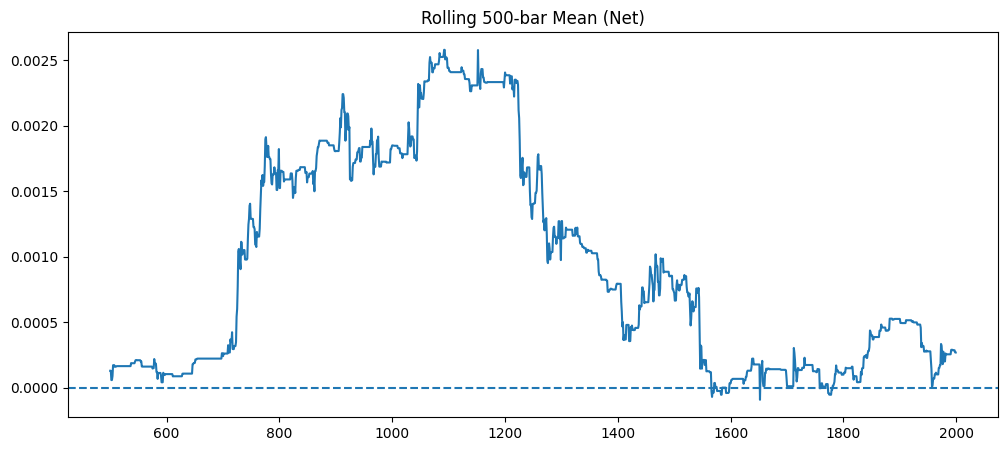

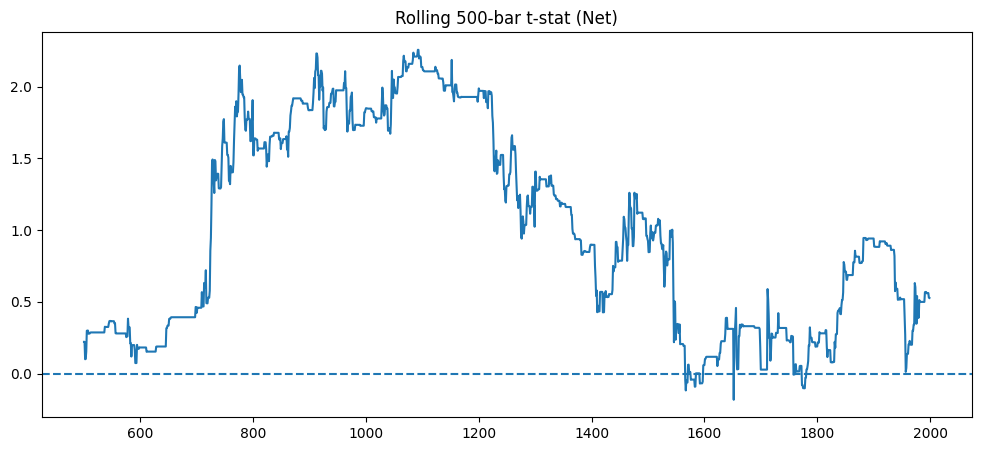

Recent 500-bar mean: 0.00026888368939373495
Recent 500-bar t-stat: 0.5269968427399567


In [79]:
# Rolling stability diagnostics on thresholded strategy

import numpy as np
import matplotlib.pyplot as plt

r_net = tr2["trade_log_return_net_thr"].to_numpy()

window = 500

rolling_mean = np.array([
    r_net[i-window:i].mean() if i >= window else np.nan
    for i in range(len(r_net))
])

rolling_t = np.array([
    compute_t(r_net[i-window:i]) if i >= window else np.nan
    for i in range(len(r_net))
])

plt.figure(figsize=(12,5))
plt.plot(rolling_mean)
plt.axhline(0, linestyle="--")
plt.title("Rolling 500-bar Mean (Net)")
plt.show()

plt.figure(figsize=(12,5))
plt.plot(rolling_t)
plt.axhline(0, linestyle="--")
plt.title("Rolling 500-bar t-stat (Net)")
plt.show()

print("Recent 500-bar mean:", np.nanmean(r_net[-500:]))
print("Recent 500-bar t-stat:", compute_t(r_net[-500:]))

In [80]:
import numpy as np
import polars as pl

def rolling_tstat_np(x: np.ndarray) -> float:
    x = np.asarray(x, dtype=float)
    if x.size < 2:
        return np.nan
    s = x.std(ddof=1)
    if s == 0 or np.isnan(s):
        return np.nan
    return x.mean() / (s / np.sqrt(x.size))

def apply_tau_and_tfilter(oos_trades: pl.DataFrame, tau: float, t_window: int, t_min: float) -> pl.DataFrame:
    # 1) tau-position
    tr = (
        oos_trades
        .select(["datetime", "y_pred", "y_true"])
        .with_columns(
            pl.when(pl.col("y_pred").abs() > pl.lit(tau))
              .then(pl.col("y_pred").sign())
              .otherwise(pl.lit(0.0))
              .alias("pos_tau")
        )
        .with_columns(
            (pl.col("pos_tau") * pl.col("y_true")).alias("r_gross_tau")
        )
    )

    # 2) fees for tau-position (correct fee_mult: 0/1/2)
    tr = (
        tr
        .with_columns([
            pl.col("pos_tau").cast(pl.Int8).alias("p"),
            pl.col("pos_tau").shift(1).cast(pl.Int8).alias("p_prev"),
        ])
        .with_columns(
            (pl.col("p") - pl.col("p_prev")).abs().fill_null(0).alias("fee_mult")
        )
        .with_columns(
            pl.when(pl.col("fee_mult") > 0)
              .then((1 - pl.lit(taker_fee) * pl.col("fee_mult")).log())
              .otherwise(pl.lit(0.0))
              .alias("fee_log")
        )
        .with_columns(
            (pl.col("r_gross_tau") + pl.col("fee_log")).alias("r_net_tau")
        )
    )

    # 3) rolling t-stat on past net returns (NO lookahead)
    r_net = tr["r_net_tau"].to_numpy()
    roll_t = np.full(r_net.shape[0], np.nan, dtype=float)
    for i in range(t_window - 1, len(r_net)):
        roll_t[i] = rolling_tstat_np(r_net[i - t_window + 1 : i + 1])
    # shift by 1 so decision at time t uses info up to t-1
    roll_t_shift = np.roll(roll_t, 1)
    roll_t_shift[0] = np.nan

    tr = tr.with_columns(pl.Series("roll_t", roll_t_shift))

    # 4) apply regime filter: if roll_t < t_min => flat
    tr = tr.with_columns(
        pl.when(pl.col("roll_t").is_not_null() & (pl.col("roll_t") >= pl.lit(t_min)))
          .then(pl.col("pos_tau"))
          .otherwise(pl.lit(0.0))
          .alias("position")
    )

    # 5) recompute fees + net returns on FINAL position stream
    tr = (
        tr
        .with_columns([
            pl.col("position").cast(pl.Int8).alias("p2"),
            pl.col("position").shift(1).cast(pl.Int8).alias("p2_prev"),
        ])
        .with_columns(
            (pl.col("p2") - pl.col("p2_prev")).abs().fill_null(0).alias("fee_mult2")
        )
        .with_columns(
            pl.when(pl.col("fee_mult2") > 0)
              .then((1 - pl.lit(taker_fee) * pl.col("fee_mult2")).log())
              .otherwise(pl.lit(0.0))
              .alias("fee_log2")
        )
        .with_columns([
            (pl.col("position") * pl.col("y_true")).alias("r_gross"),
            (pl.col("position") * pl.col("y_true") + pl.col("fee_log2")).alias("r_net"),
            pl.col("r_net").cum_sum().alias("eq_log_net"),
            pl.col("r_gross").cum_sum().alias("eq_log_gross"),
        ])
    )

    return tr

def summarize_strategy(tr: pl.DataFrame) -> dict:
    r = tr["r_net"].to_numpy()
    eqlog = tr["eq_log_net"].to_numpy()
    mean = float(r.mean())
    std  = float(r.std(ddof=1)) if len(r) > 1 else np.nan
    t    = rolling_tstat_np(r)
    sharpe = (mean / std) * np.sqrt(annualized_rate) if std and not np.isnan(std) else np.nan
    max_dd = float((eqlog - np.maximum.accumulate(eqlog)).min())
    return {
        "in_market_rate": float((tr["position"] != 0).mean()),
        "flip_rate": float((tr["fee_mult2"] > 0).mean()),
        "mean_net": mean,
        "t_net": float(t),
        "sharpe_net": float(sharpe),
        "final_eq_net": float(np.exp(eqlog[-1])) if len(eqlog) else np.nan,
        "max_dd_log_net": max_dd,
        "total_fee_log": float(tr["fee_log2"].sum()),
    }

In [82]:
import numpy as np
import polars as pl

def rolling_tstat_np(x: np.ndarray) -> float:
    x = np.asarray(x, dtype=float)
    if x.size < 2:
        return np.nan
    s = x.std(ddof=1)
    if s == 0 or np.isnan(s):
        return np.nan
    return x.mean() / (s / np.sqrt(x.size))

def apply_tau_and_tfilter(oos_trades: pl.DataFrame, tau: float, t_window: int, t_min: float) -> pl.DataFrame:
    # 1) tau-position
    tr = (
        oos_trades
        .select(["datetime", "y_pred", "y_true"])
        .with_columns(
            pl.when(pl.col("y_pred").abs() > pl.lit(tau))
              .then(pl.col("y_pred").sign())
              .otherwise(pl.lit(0.0))
              .alias("pos_tau")
        )
        .with_columns(
            (pl.col("pos_tau") * pl.col("y_true")).alias("r_gross_tau")
        )
    )

    # 2) fees for tau-position (correct fee_mult: 0/1/2)
    tr = (
        tr
        .with_columns([
            pl.col("pos_tau").cast(pl.Int8).alias("p"),
            pl.col("pos_tau").shift(1).cast(pl.Int8).alias("p_prev"),
        ])
        .with_columns(
            (pl.col("p") - pl.col("p_prev")).abs().fill_null(0).alias("fee_mult")
        )
        .with_columns(
            pl.when(pl.col("fee_mult") > 0)
              .then((1 - pl.lit(taker_fee) * pl.col("fee_mult")).log())
              .otherwise(pl.lit(0.0))
              .alias("fee_log")
        )
        .with_columns(
            (pl.col("r_gross_tau") + pl.col("fee_log")).alias("r_net_tau")
        )
    )

    # 3) rolling t-stat on past net returns (NO lookahead)
    r_net = tr["r_net_tau"].to_numpy()
    roll_t = np.full(r_net.shape[0], np.nan, dtype=float)
    for i in range(t_window - 1, len(r_net)):
        roll_t[i] = rolling_tstat_np(r_net[i - t_window + 1 : i + 1])

    # shift by 1 so decision at time t uses info up to t-1
    roll_t_shift = np.roll(roll_t, 1)
    roll_t_shift[0] = np.nan
    tr = tr.with_columns(pl.Series("roll_t", roll_t_shift))

    # 4) apply regime filter: if roll_t < t_min => flat
    tr = tr.with_columns(
        pl.when(pl.col("roll_t").is_not_null() & (pl.col("roll_t") >= pl.lit(t_min)))
          .then(pl.col("pos_tau"))
          .otherwise(pl.lit(0.0))
          .alias("position")
    )

    # 5) recompute fees + returns on FINAL position stream (split into steps!)
    tr = (
        tr
        .with_columns([
            pl.col("position").cast(pl.Int8).alias("p2"),
            pl.col("position").shift(1).cast(pl.Int8).alias("p2_prev"),
        ])
        .with_columns(
            (pl.col("p2") - pl.col("p2_prev")).abs().fill_null(0).alias("fee_mult2")
        )
        .with_columns(
            pl.when(pl.col("fee_mult2") > 0)
              .then((1 - pl.lit(taker_fee) * pl.col("fee_mult2")).log())
              .otherwise(pl.lit(0.0))
              .alias("fee_log2")
        )
        # create r_gross and r_net FIRST
        .with_columns([
            (pl.col("position") * pl.col("y_true")).alias("r_gross"),
            (pl.col("position") * pl.col("y_true") + pl.col("fee_log2")).alias("r_net"),
        ])
        # then cumsum in a separate call
        .with_columns([
            pl.col("r_net").cum_sum().alias("eq_log_net"),
            pl.col("r_gross").cum_sum().alias("eq_log_gross"),
        ])
    )

    return tr

In [83]:
abs_pred = oos_trades["y_pred"].abs().to_numpy()
tau20 = float(np.quantile(abs_pred, 0.20))

t_window = 500
t_min = 0.5

tr_f = apply_tau_and_tfilter(oos_trades, tau=tau20, t_window=t_window, t_min=t_min)
print("tau:", tau20, "t_window:", t_window, "t_min:", t_min)
print(summarize_strategy(tr_f))

tau: 0.005346047226339579 t_window: 500 t_min: 0.5
{'in_market_rate': 0.6875, 'flip_rate': 0.4965, 'mean_net': 0.0008424566773161297, 't_net': 1.6484860890315902, 'sharpe_net': 0.21204294071554103, 'final_eq_net': 5.391983721696397, 'max_dd_log_net': -0.5931826483152235, 'total_fee_log': -0.6599443458169523}


In [84]:
import numpy as np
import polars as pl

abs_pred = oos_trades["y_pred"].abs().to_numpy()

taus = [float(np.quantile(abs_pred, q)) for q in [0.10, 0.20, 0.30, 0.40]]
t_mins = [0.0, 0.25, 0.5, 0.75, 1.0]
t_window = 500

rows = []
cache = {}

for tau in taus:
    for t_min in t_mins:
        tr = apply_tau_and_tfilter(oos_trades, tau=tau, t_window=t_window, t_min=t_min)
        s = summarize_strategy(tr)  # your existing summarize_strategy
        s["tau"] = tau
        s["t_min"] = t_min
        rows.append(s)
        cache[(tau, t_min)] = tr

res_grid = pl.DataFrame(rows).with_columns([
    pl.col("max_dd_log_net").map_elements(lambda x: float(np.exp(x)) if x is not None else None).alias("dd_multiple"),
    (pl.col("flip_rate") * 2 * pl.lit(taker_fee)).alias("approx_fee_per_bar"),  # quick sanity proxy
])

print(
    res_grid.select([
        "tau","t_min",
        "in_market_rate","flip_rate",
        "mean_net","t_net","sharpe_net",
        "final_eq_net","max_dd_log_net","dd_multiple",
        "total_fee_log",
        "approx_fee_per_bar",
    ]).sort("t_net", descending=True)
)

shape: (20, 12)
┌──────────┬───────┬────────────┬───────────┬───┬────────────┬────────────┬────────────┬───────────┐
│ tau      ┆ t_min ┆ in_market_ ┆ flip_rate ┆ … ┆ max_dd_log ┆ dd_multipl ┆ total_fee_ ┆ approx_fe │
│ ---      ┆ ---   ┆ rate       ┆ ---       ┆   ┆ _net       ┆ e          ┆ log        ┆ e_per_bar │
│ f64      ┆ f64   ┆ ---        ┆ f64       ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---       │
│          ┆       ┆ f64        ┆           ┆   ┆ f64        ┆ f64        ┆ f64        ┆ f64       │
╞══════════╪═══════╪════════════╪═══════════╪═══╪════════════╪════════════╪════════════╪═══════════╡
│ 0.005346 ┆ 0.25  ┆ 0.714      ┆ 0.508     ┆ … ┆ -0.593183  ┆ 0.552566   ┆ -0.677952  ┆ 0.0004572 │
│ 0.005346 ┆ 0.0   ┆ 0.724      ┆ 0.513     ┆ … ┆ -0.593183  ┆ 0.552566   ┆ -0.686956  ┆ 0.0004617 │
│ 0.008449 ┆ 0.0   ┆ 0.6335     ┆ 0.5305    ┆ … ┆ -0.533956  ┆ 0.586281   ┆ -0.64462   ┆ 0.000477  │
│ 0.008449 ┆ 0.25  ┆ 0.605      ┆ 0.5075    ┆ … ┆ -0.533956  ┆ 0.586281   ┆

In [85]:
res_grid.write_csv("res_grid.csv")

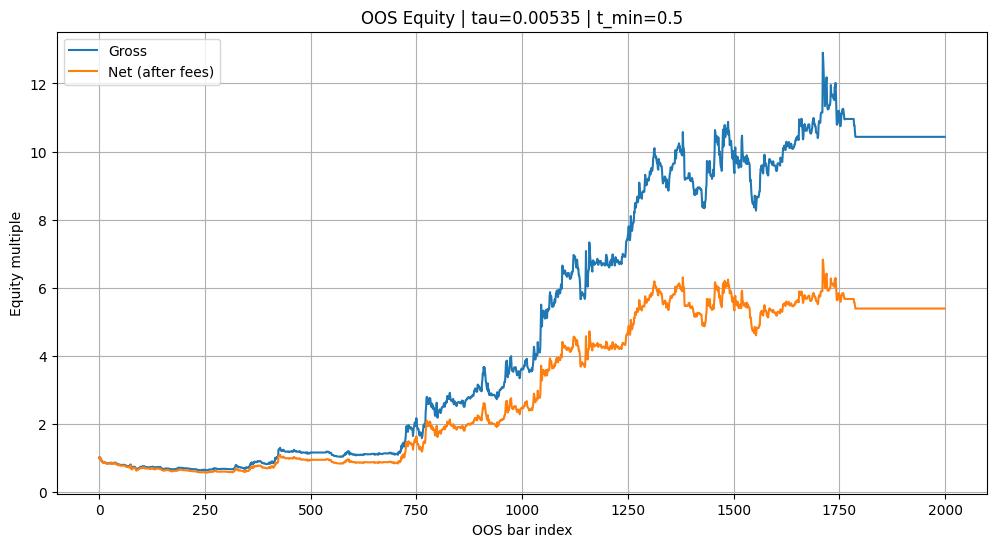

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# use your chosen parameters
tau = tau20
t_min = 0.5
t_window = 500

tr_plot = apply_tau_and_tfilter(oos_trades, tau=tau, t_window=t_window, t_min=t_min)

eq_net = np.exp(tr_plot["eq_log_net"].to_numpy())
eq_gross = np.exp(tr_plot["eq_log_gross"].to_numpy())

plt.figure(figsize=(12,6))
plt.plot(eq_gross, label="Gross")
plt.plot(eq_net, label="Net (after fees)")
plt.title(f"OOS Equity | tau={tau:.5f} | t_min={t_min}")
plt.xlabel("OOS bar index")
plt.ylabel("Equity multiple")
plt.legend()
plt.grid(True)
plt.show()

In [87]:
r = tr_plot["r_net"].to_numpy()

print("Mean:", r.mean())
print("Std:", r.std(ddof=1))
print("Mean / Std:", r.mean()/r.std(ddof=1))

Mean: 0.0008424566773161297
Std: 0.022854792783651712
Mean / Std: 0.03686126955037406


In [88]:
np.mean(r[-500:])
np.std(r[-500:], ddof=1)

np.float64(0.013599910432931482)

In [89]:
print(r.shape)

(2000,)


In [90]:
print("Last 5 returns:", r[-5:])
print("Last 5 equity_log:", tr_plot["eq_log_net"].to_numpy()[-5:])
print("Mean last 500 (r):", r[-500:].mean())
print("Std last 500 (r):", r[-500:].std(ddof=1))

Last 5 returns: [0. 0. 0. 0. 0.]
Last 5 equity_log: [1.68491335 1.68491335 1.68491335 1.68491335 1.68491335]
Mean last 500 (r): -0.00011615210227646713
Std last 500 (r): 0.013599910432931482


In [91]:
r_all = r
print("First half cum log:", r_all[:1000].sum())
print("Second half cum log:", r_all[1000:].sum())

First half cum log: 0.9099741586583877
Second half cum log: 0.7749391959738717


=== Monte Carlo summary (i.i.d normal log-returns) ===
             paths: 10000
      horizon_bars: 600
          leverage: 2.0
              mu_L: 0.0016849133546322594
           sigma_L: 0.045709585567303423
        P(final>1): 0.8199
    P(maxDD<=-50%): 0.7797
     final_eq_mean: 5.171277568658741
   final_eq_median: 2.7908959657357983
      final_eq_p05: 0.44417724788048096
      final_eq_p25: 1.3087946827267194
      final_eq_p75: 5.889576194928406
      final_eq_p95: 17.60763391883921
        maxDD_mean: -0.6079174366812906
      maxDD_median: -0.5999715277137966
         maxDD_p05: -0.8354221778232571
         maxDD_p95: -0.4052683908515051


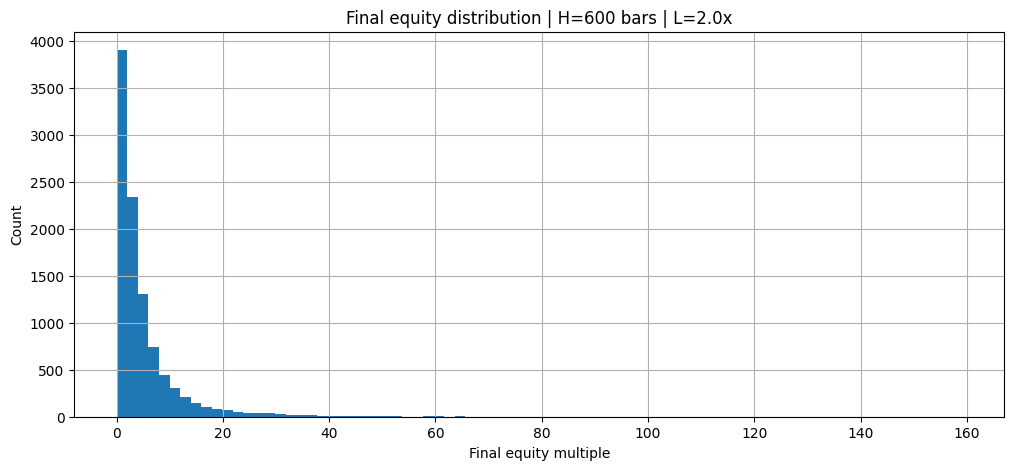

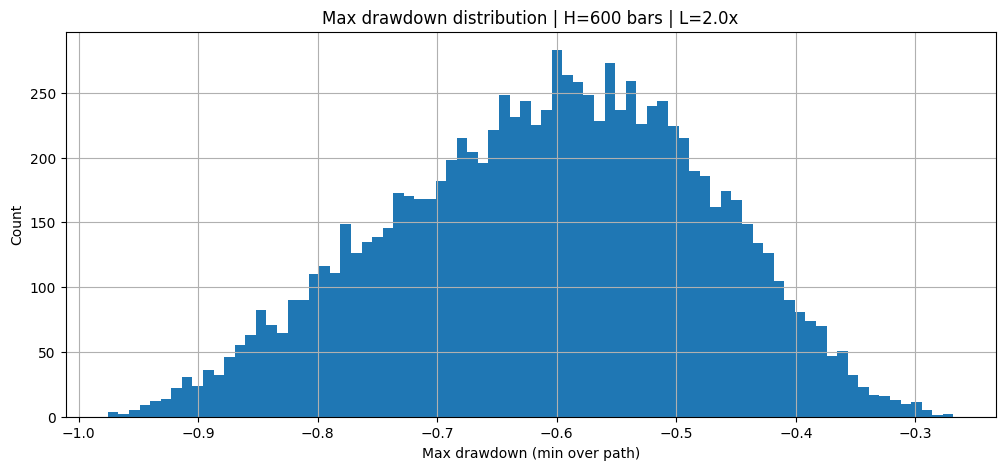

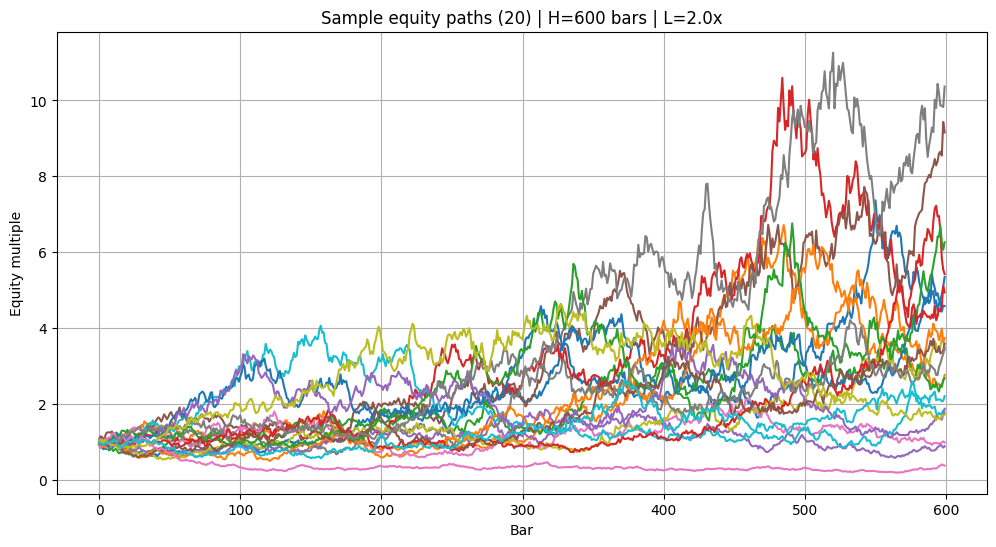

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Inputs (from your printed stats)
# =========================
mu = 0.0008424566773161297
sigma = 0.022854792783651712

L = 2.0              # leverage
H = 600              # bars horizon
N_PATHS = 10_000
SEED = 123

rng = np.random.default_rng(SEED)

# =========================
# Monte Carlo (log-return model)
# =========================
mu_L = L * mu
sigma_L = L * sigma

# draw log returns: shape (N_PATHS, H)
r = rng.normal(loc=mu_L, scale=sigma_L, size=(N_PATHS, H))

# log-equity and equity
log_eq = np.cumsum(r, axis=1)
eq = np.exp(log_eq)  # starts at exp(0)=1 at step 0 implicitly

final_eq = eq[:, -1]

# =========================
# Max drawdown per path (in linear equity space)
# =========================
running_peak = np.maximum.accumulate(eq, axis=1)
dd = eq / running_peak - 1.0   # drawdown is negative
max_dd = dd.min(axis=1)        # most negative drawdown

# =========================
# Summaries
# =========================
def pct(x, p):
    return float(np.quantile(x, p))

summary = {
    "paths": N_PATHS,
    "horizon_bars": H,
    "leverage": L,
    "mu_L": float(mu_L),
    "sigma_L": float(sigma_L),
    "P(final>1)": float((final_eq > 1.0).mean()),
    "P(maxDD<=-50%)": float((max_dd <= -0.50).mean()),
    "final_eq_mean": float(final_eq.mean()),
    "final_eq_median": float(np.median(final_eq)),
    "final_eq_p05": pct(final_eq, 0.05),
    "final_eq_p25": pct(final_eq, 0.25),
    "final_eq_p75": pct(final_eq, 0.75),
    "final_eq_p95": pct(final_eq, 0.95),
    "maxDD_mean": float(max_dd.mean()),
    "maxDD_median": float(np.median(max_dd)),
    "maxDD_p05": pct(max_dd, 0.05),
    "maxDD_p95": pct(max_dd, 0.95),
}

print("=== Monte Carlo summary (i.i.d normal log-returns) ===")
for k, v in summary.items():
    print(f"{k:>18}: {v}")

# =========================
# Plots
# =========================
plt.figure(figsize=(12,5))
plt.hist(final_eq, bins=80)
plt.title(f"Final equity distribution | H={H} bars | L={L}x")
plt.xlabel("Final equity multiple")
plt.ylabel("Count")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.hist(max_dd, bins=80)
plt.title(f"Max drawdown distribution | H={H} bars | L={L}x")
plt.xlabel("Max drawdown (min over path)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# show a few sample paths
plt.figure(figsize=(12,6))
idx = rng.choice(N_PATHS, size=20, replace=False)
for i in idx:
    plt.plot(eq[i])
plt.title(f"Sample equity paths (20) | H={H} bars | L={L}x")
plt.xlabel("Bar")
plt.ylabel("Equity multiple")
plt.grid(True)
plt.show()

In [93]:
# % finishing profitable
p_profit = (final_eq > 1.0).mean()

# % finishing down more than 50%
p_final_50_loss = (final_eq < 0.5).mean()

# % finishing down more than 80%
p_final_80_loss = (final_eq < 0.2).mean()

# % finishing down more than 90% (near ruin)
p_final_90_loss = (final_eq < 0.1).mean()

# % experiencing >90% drawdown at ANY point
p_dd_90 = (max_dd <= -0.90).mean()

print("P(finish > 1x):", p_profit)
print("P(finish < 0.5x):", p_final_50_loss)
print("P(finish < 0.2x):", p_final_80_loss)
print("P(finish < 0.1x):", p_final_90_loss)
print("P(maxDD <= -90% at any time):", p_dd_90)

P(finish > 1x): 0.8199
P(finish < 0.5x): 0.0608
P(finish < 0.2x): 0.0096
P(finish < 0.1x): 0.0013
P(maxDD <= -90% at any time): 0.0113


In [96]:
for c in tr_plot.columns:
    if "equity" in c:
        print(c)

In [97]:
print(tr_plot.columns)

['datetime', 'y_pred', 'y_true', 'pos_tau', 'r_gross_tau', 'p', 'p_prev', 'fee_mult', 'fee_log', 'r_net_tau', 'roll_t', 'position', 'p2', 'p2_prev', 'fee_mult2', 'fee_log2', 'r_gross', 'r_net', 'eq_log_net', 'eq_log_gross']


In [98]:
import numpy as np

r_net = tr_plot["r_net"].to_numpy()
eq_net = tr_plot["eq_log_net"].to_numpy()

r_g = tr_plot["r_gross"].to_numpy()
eq_g = tr_plot["eq_log_gross"].to_numpy()

print("NET:  eq_last vs sum(r_net):", float(eq_net[-1]), float(r_net.sum()), "diff:", float(eq_net[-1] - r_net.sum()))
print("GROSS:eq_last vs sum(r_g):  ", float(eq_g[-1]),   float(r_g.sum()),   "diff:", float(eq_g[-1] - r_g.sum()))

NET:  eq_last vs sum(r_net): 1.6849133546322286 1.6849133546322594 diff: -3.086420008457935e-14
GROSS:eq_last vs sum(r_g):   2.3448574542999268 2.344857692718506 diff: -2.384185791015625e-07


In [99]:
eq_mult_net = float(np.exp(eq_net[-1]))
eq_mult_g   = float(np.exp(eq_g[-1]))

print("Final equity multiple (NET):", eq_mult_net)
print("Final equity multiple (GROSS):", eq_mult_g)

Final equity multiple (NET): 5.391983721696397
Final equity multiple (GROSS): 10.431785583496094


In [100]:
fee_log2 = tr_plot["fee_log2"].to_numpy()

diff = r_net - (r_g + fee_log2)
print("Check r_net == r_gross + fee_log2")
print("max abs diff:", float(np.max(np.abs(diff))))
print("mean abs diff:", float(np.mean(np.abs(diff))))

Check r_net == r_gross + fee_log2
max abs diff: 0.0
mean abs diff: 0.0


In [101]:
print("sum(r_net - r_gross):", float((r_net - r_g).sum()))
print("sum(fee_log2):", float(fee_log2.sum()))

sum(r_net - r_gross): -0.6599443458169523
sum(fee_log2): -0.6599443458169525


In [104]:
import polars as pl

# min/max in one table
print(
    tr_plot.select([
        pl.col("fee_mult2").min().alias("min_fee_mult2"),
        pl.col("fee_mult2").max().alias("max_fee_mult2"),
    ])
)

# value counts as a separate dataframe, then sort
fee_counts = (
    tr_plot
    .select(pl.col("fee_mult2").value_counts())
    .unnest("fee_mult2")          # expands into columns: fee_mult2, count
    .sort("fee_mult2")
)

print(fee_counts)

shape: (1, 2)
┌───────────────┬───────────────┐
│ min_fee_mult2 ┆ max_fee_mult2 │
│ ---           ┆ ---           │
│ i8            ┆ i8            │
╞═══════════════╪═══════════════╡
│ 0             ┆ 2             │
└───────────────┴───────────────┘
shape: (3, 2)
┌───────────┬───────┐
│ fee_mult2 ┆ count │
│ ---       ┆ ---   │
│ i8        ┆ u32   │
╞═══════════╪═══════╡
│ 0         ┆ 1007  │
│ 1         ┆ 520   │
│ 2         ┆ 473   │
└───────────┴───────┘


In [103]:
eq_net_path = np.exp(eq_net)
peak = np.maximum.accumulate(eq_net_path)
dd = (eq_net_path / peak) - 1.0
print("Max drawdown (NET, level):", float(dd.min()))

Max drawdown (NET, level): -0.4474341395804461


In [105]:
import numpy as np
import polars as pl

# --- Inputs ---
FEE = float(taker_fee)  # should be 0.00045
fee_log_1x = float(np.log(1 - 2*FEE))       # 1x roundtrip
fee_log_2x = float(np.log(1 - 4*FEE))       # 2x roundtrip (if you ever use fee_mult=2)

print("taker_fee:", FEE)
print("fee_log_1x (roundtrip):", fee_log_1x, " | approx -2*fee:", -2*FEE)
print("fee_log_2x (roundtrip*2):", fee_log_2x, " | approx -4*fee:", -4*FEE)

# --- 1) Build a tiny deterministic toy example ---
toy = pl.DataFrame({
    "position": [0,  1,  1, -1, -1, 0,  1, 0],   # includes enter, hold, flip, exit
    "y_true":   [0.0, 0.01, -0.02, 0.03, -0.01, 0.0, 0.02, -0.02],  # bar returns
})

# gross return = position * y_true
toy = toy.with_columns(
    (pl.col("position") * pl.col("y_true")).alias("r_gross")
)

# fee_mult: abs change in position (0/1/2)
toy = toy.with_columns([
    pl.col("position").cast(pl.Int8).alias("p"),
    pl.col("position").shift(1).cast(pl.Int8).alias("p_prev"),
]).with_columns(
    (pl.col("p") - pl.col("p_prev")).abs().fill_null(0).alias("fee_mult")
)

# fee_log based on fee_mult: fee_mult * log(1-2*fee)
toy = toy.with_columns(
    (pl.col("fee_mult") * pl.lit(fee_log_1x)).alias("fee_log")
)

# net return
toy = toy.with_columns(
    (pl.col("r_gross") + pl.col("fee_log")).alias("r_net")
).with_columns([
    pl.col("r_gross").cum_sum().alias("eq_log_gross"),
    pl.col("r_net").cum_sum().alias("eq_log_net"),
])

print("\n--- TOY TABLE (audit) ---")
print(toy)

print("\n--- CHECKS ---")
# fee_mult must be in {0,1,2}
print("fee_mult unique:", toy.select(pl.col("fee_mult").unique().sort()).to_series().to_list())

# net = gross + fee_log (exact)
diff = (toy["r_net"] - (toy["r_gross"] + toy["fee_log"])).to_numpy()
print("max abs diff (r_net - (r_gross+fee_log)):", float(np.max(np.abs(diff))))

# equity consistency
print("eq_log_net last vs sum(r_net):", float(toy["eq_log_net"][-1]), float(toy["r_net"].sum()))
print("eq_log_gross last vs sum(r_gross):", float(toy["eq_log_gross"][-1]), float(toy["r_gross"].sum()))

# show how many times we charged fees and how much total
print("total fee_log:", float(toy["fee_log"].sum()))
print("count fee_mult==1:", int((toy["fee_mult"]==1).sum()))
print("count fee_mult==2:", int((toy["fee_mult"]==2).sum()))

taker_fee: 0.00045
fee_log_1x (roundtrip): -0.0009004052431641551  | approx -2*fee: -0.0009
fee_log_2x (roundtrip*2): -0.0018016219466282088  | approx -4*fee: -0.0018

--- TOY TABLE (audit) ---
shape: (8, 10)
┌──────────┬────────┬─────────┬─────┬───┬───────────┬───────────┬──────────────┬────────────┐
│ position ┆ y_true ┆ r_gross ┆ p   ┆ … ┆ fee_log   ┆ r_net     ┆ eq_log_gross ┆ eq_log_net │
│ ---      ┆ ---    ┆ ---     ┆ --- ┆   ┆ ---       ┆ ---       ┆ ---          ┆ ---        │
│ i64      ┆ f64    ┆ f64     ┆ i8  ┆   ┆ f64       ┆ f64       ┆ f64          ┆ f64        │
╞══════════╪════════╪═════════╪═════╪═══╪═══════════╪═══════════╪══════════════╪════════════╡
│ 0        ┆ 0.0    ┆ 0.0     ┆ 0   ┆ … ┆ -0.0      ┆ 0.0       ┆ 0.0          ┆ 0.0        │
│ 1        ┆ 0.01   ┆ 0.01    ┆ 1   ┆ … ┆ -0.0009   ┆ 0.0091    ┆ 0.01         ┆ 0.0091     │
│ 1        ┆ -0.02  ┆ -0.02   ┆ 1   ┆ … ┆ -0.0      ┆ -0.02     ┆ -0.01        ┆ -0.0109    │
│ -1       ┆ 0.03   ┆ -0.03   ┆ -1  ┆ …

In [106]:
import numpy as np
import polars as pl

# We assume your main dataframe is `df` and includes:
# ['datetime','close','close_log_return','close_log_return_lag_1',...]
# If your base dataframe is named differently, replace df -> your_df_name.

cols_needed = ["datetime", "close", "close_log_return"]
assert all(c in df.columns for c in cols_needed), f"Missing one of {cols_needed}"

# 1) Recompute log returns from close (independent check)
df_chk = (
    df
    .select(["datetime", "close", "close_log_return"] + [c for c in df.columns if "lag_" in c])
    .with_columns([
        (pl.col("close").log() - pl.col("close").shift(1).log()).alias("logret_recomputed"),
        (pl.col("close") / pl.col("close").shift(1) - 1.0).alias("simple_ret_recomputed"),
    ])
)

# 2) Compare stored vs recomputed log returns
diff = (
    df_chk
    .with_columns((pl.col("close_log_return") - pl.col("logret_recomputed")).alias("diff"))
    .select([
        pl.col("diff").abs().max().alias("max_abs_diff"),
        pl.col("diff").abs().mean().alias("mean_abs_diff"),
        pl.col("diff").is_null().sum().alias("n_null_diff"),
    ])
)

print("=== log-return consistency (stored vs recomputed) ===")
print(diff)

# 3) Spot-check a few rows manually (including first non-null)
print("\n=== first 8 rows (for visual sanity) ===")
print(df_chk.head(8))

# 4) Verify lag columns are exactly shifted versions of close_log_return
lag_cols = [c for c in df.columns if c.startswith("close_log_return_lag_")]
lag_cols = sorted(lag_cols, key=lambda s: int(s.split("_")[-1]))  # sort by lag number

print("\nLag cols found:", lag_cols)

checks = []
for c in lag_cols:
    k = int(c.split("_")[-1])
    # compare lag column to shifted target
    tmp = (
        df
        .select([c, "close_log_return"])
        .with_columns((pl.col(c) - pl.col("close_log_return").shift(k)).alias("d"))
        .select(pl.col("d").abs().max().alias("max_abs_diff"))
    )
    checks.append((c, k, float(tmp[0, "max_abs_diff"])))

print("\n=== lag checks (max abs diff should be 0 or ~1e-12) ===")
for c, k, mad in checks:
    print(f"{c:25s} lag={k}  max_abs_diff={mad}")

# 5) Verify no weird close values
print("\n=== close sanity ===")
print(df.select([
    pl.col("close").min().alias("min_close"),
    pl.col("close").max().alias("max_close"),
    pl.col("close").is_null().sum().alias("n_null_close"),
]).to_dicts())

=== log-return consistency (stored vs recomputed) ===
shape: (1, 3)
┌──────────────┬───────────────┬─────────────┐
│ max_abs_diff ┆ mean_abs_diff ┆ n_null_diff │
│ ---          ┆ ---           ┆ ---         │
│ f64          ┆ f64           ┆ u32         │
╞══════════════╪═══════════════╪═════════════╡
│ 2.9143e-16   ┆ 5.7410e-17    ┆ 1           │
└──────────────┴───────────────┴─────────────┘

=== first 8 rows (for visual sanity) ===
shape: (8, 11)
┌────────────┬────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ datetime   ┆ close  ┆ close_log_ ┆ close_log ┆ … ┆ close_log ┆ close_log ┆ logret_re ┆ simple_re │
│ ---        ┆ ---    ┆ return     ┆ _return_l ┆   ┆ _return_l ┆ _return_l ┆ computed  ┆ t_recompu │
│ datetime[μ ┆ f64    ┆ ---        ┆ ag_1      ┆   ┆ ag_5      ┆ ag_6      ┆ ---       ┆ ted       │
│ s]         ┆        ┆ f64        ┆ ---       ┆   ┆ ---       ┆ ---       ┆ f64       ┆ ---       │
│            ┆        ┆            ┆ f64 

In [108]:
import numpy as np

y_pred = oos_trades["y_pred"].to_numpy()
y_true = oos_trades["y_true"].to_numpy()

def corr(a, b):
    a = np.asarray(a); b = np.asarray(b)
    m = np.isfinite(a) & np.isfinite(b)
    if m.sum() < 3:
        return np.nan
    return float(np.corrcoef(a[m], b[m])[0,1])

print("Corr(y_pred[t],   y_true[t]):   ", corr(y_pred, y_true))
print("Corr(y_pred[t-1], y_true[t]):   ", corr(y_pred[:-1], y_true[1:]))
print("Corr(y_pred[t+1], y_true[t]):   ", corr(y_pred[1:],  y_true[:-1]))

# Directional accuracy (same-time)
acc_t = float((np.sign(y_pred) == np.sign(y_true)).mean())
print("Directional acc (t vs t):", acc_t)

# Directional accuracy if shifted (t-1 predicts t)
acc_lag1 = float((np.sign(y_pred[:-1]) == np.sign(y_true[1:])).mean())
print("Directional acc (t-1 vs t):", acc_lag1)

Corr(y_pred[t],   y_true[t]):    0.06301794891884979
Corr(y_pred[t-1], y_true[t]):    0.04512604675945267
Corr(y_pred[t+1], y_true[t]):    0.5140823909083114
Directional acc (t vs t): 0.479
Directional acc (t-1 vs t): 0.49074537268634316


In [109]:
# Check whether shifting prediction improves performance

import numpy as np

# Current performance
r_current = np.sign(y_pred) * y_true
mean_current = r_current.mean()

# Shift prediction forward one bar (more realistic)
r_shifted = np.sign(y_pred[:-1]) * y_true[1:]
mean_shifted = r_shifted.mean()

print("Mean current:", mean_current)
print("Mean shifted:", mean_shifted)

Mean current: 0.0009220718
Mean shifted: 0.0010257065


In [111]:
print("\nMin / Max datetime:")
print(
    oos_trades.select([
        pl.col("datetime").min().alias("dt_min"),
        pl.col("datetime").max().alias("dt_max"),
    ])
)

print("\nWindow id counts:")
print(
    oos_trades
    .group_by("window_id")
    .len()
    .sort("window_id")
)


Min / Max datetime:
shape: (1, 2)
┌─────────────────────┬─────────────────────┐
│ dt_min              ┆ dt_max              │
│ ---                 ┆ ---                 │
│ datetime[μs]        ┆ datetime[μs]        │
╞═════════════════════╪═════════════════════╡
│ 2024-03-19 08:00:00 ┆ 2026-01-14 16:00:00 │
└─────────────────────┴─────────────────────┘

Window id counts:
shape: (10, 2)
┌───────────┬─────┐
│ window_id ┆ len │
│ ---       ┆ --- │
│ i64       ┆ u32 │
╞═══════════╪═════╡
│ 0         ┆ 200 │
│ 1         ┆ 200 │
│ 2         ┆ 200 │
│ 3         ┆ 200 │
│ 4         ┆ 200 │
│ 5         ┆ 200 │
│ 6         ┆ 200 │
│ 7         ┆ 200 │
│ 8         ┆ 200 │
│ 9         ┆ 200 │
└───────────┴─────┘


In [112]:
# per-fold datetime ranges
fold_ranges = (
    oos_trades
    .group_by("window_id")
    .agg([
        pl.col("datetime").min().alias("dt_start"),
        pl.col("datetime").max().alias("dt_end"),
        pl.len().alias("n"),
    ])
    .sort("window_id")
)

print(fold_ranges)

# check that each fold starts exactly 1 bar after previous fold ends
fold_ranges2 = fold_ranges.with_columns([
    pl.col("dt_start").shift(1).alias("prev_start"),
    pl.col("dt_end").shift(1).alias("prev_end"),
])

print(
    fold_ranges2.select([
        (pl.col("dt_start") > pl.col("prev_end")).fill_null(True).alias("starts_after_prev_end"),
        (pl.col("dt_start") == pl.col("prev_end")).fill_null(False).alias("starts_equal_prev_end"),
    ])
)

shape: (10, 4)
┌───────────┬─────────────────────┬─────────────────────┬─────┐
│ window_id ┆ dt_start            ┆ dt_end              ┆ n   │
│ ---       ┆ ---                 ┆ ---                 ┆ --- │
│ i64       ┆ datetime[μs]        ┆ datetime[μs]        ┆ u32 │
╞═══════════╪═════════════════════╪═════════════════════╪═════╡
│ 0         ┆ 2024-03-19 08:00:00 ┆ 2024-05-24 16:00:00 ┆ 200 │
│ 1         ┆ 2024-05-25 00:00:00 ┆ 2024-07-30 08:00:00 ┆ 200 │
│ 2         ┆ 2024-07-30 16:00:00 ┆ 2024-10-05 00:00:00 ┆ 200 │
│ 3         ┆ 2024-10-05 08:00:00 ┆ 2024-12-10 16:00:00 ┆ 200 │
│ 4         ┆ 2024-12-11 00:00:00 ┆ 2025-02-15 08:00:00 ┆ 200 │
│ 5         ┆ 2025-02-15 16:00:00 ┆ 2025-04-23 00:00:00 ┆ 200 │
│ 6         ┆ 2025-04-23 08:00:00 ┆ 2025-06-28 16:00:00 ┆ 200 │
│ 7         ┆ 2025-06-29 00:00:00 ┆ 2025-09-03 08:00:00 ┆ 200 │
│ 8         ┆ 2025-09-03 16:00:00 ┆ 2025-11-09 00:00:00 ┆ 200 │
│ 9         ┆ 2025-11-09 08:00:00 ┆ 2026-01-14 16:00:00 ┆ 200 │
└───────────┴────────────

In [113]:
# per-fold datetime ranges
fold_ranges = (
    oos_trades
    .group_by("window_id")
    .agg([
        pl.col("datetime").min().alias("dt_start"),
        pl.col("datetime").max().alias("dt_end"),
        pl.len().alias("n"),
    ])
    .sort("window_id")
)

print(fold_ranges)

# check that each fold starts exactly 1 bar after previous fold ends
fold_ranges2 = fold_ranges.with_columns([
    pl.col("dt_start").shift(1).alias("prev_start"),
    pl.col("dt_end").shift(1).alias("prev_end"),
])

print(
    fold_ranges2.select([
        (pl.col("dt_start") > pl.col("prev_end")).fill_null(True).alias("starts_after_prev_end"),
        (pl.col("dt_start") == pl.col("prev_end")).fill_null(False).alias("starts_equal_prev_end"),
    ])
)

shape: (10, 4)
┌───────────┬─────────────────────┬─────────────────────┬─────┐
│ window_id ┆ dt_start            ┆ dt_end              ┆ n   │
│ ---       ┆ ---                 ┆ ---                 ┆ --- │
│ i64       ┆ datetime[μs]        ┆ datetime[μs]        ┆ u32 │
╞═══════════╪═════════════════════╪═════════════════════╪═════╡
│ 0         ┆ 2024-03-19 08:00:00 ┆ 2024-05-24 16:00:00 ┆ 200 │
│ 1         ┆ 2024-05-25 00:00:00 ┆ 2024-07-30 08:00:00 ┆ 200 │
│ 2         ┆ 2024-07-30 16:00:00 ┆ 2024-10-05 00:00:00 ┆ 200 │
│ 3         ┆ 2024-10-05 08:00:00 ┆ 2024-12-10 16:00:00 ┆ 200 │
│ 4         ┆ 2024-12-11 00:00:00 ┆ 2025-02-15 08:00:00 ┆ 200 │
│ 5         ┆ 2025-02-15 16:00:00 ┆ 2025-04-23 00:00:00 ┆ 200 │
│ 6         ┆ 2025-04-23 08:00:00 ┆ 2025-06-28 16:00:00 ┆ 200 │
│ 7         ┆ 2025-06-29 00:00:00 ┆ 2025-09-03 08:00:00 ┆ 200 │
│ 8         ┆ 2025-09-03 16:00:00 ┆ 2025-11-09 00:00:00 ┆ 200 │
│ 9         ┆ 2025-11-09 08:00:00 ┆ 2026-01-14 16:00:00 ┆ 200 │
└───────────┴────────────

In [115]:
import polars as pl

diag = (
    oos_trades
    .select(["datetime", "y_pred", "y_true"])
    # 1) create shifted targets first
    .with_columns([
        pl.col("y_true").shift(-1).alias("y_true_next"),
        pl.col("y_true").shift(1).alias("y_true_prev"),
    ])
    # 2) then compute the three return variants
    .with_columns([
        (pl.col("y_pred").sign() * pl.col("y_true")).alias("r0"),
        (pl.col("y_pred").sign() * pl.col("y_true_next")).alias("r_plus1"),
        (pl.col("y_pred").sign() * pl.col("y_true_prev")).alias("r_minus1"),
    ])
)

print(
    diag.select([
        pl.col("r0").mean().alias("mean_r0"),
        pl.col("r_plus1").mean().alias("mean_r_plus1"),
        pl.col("r_minus1").mean().alias("mean_r_minus1"),
    ])
)

print(
    diag.select([
        pl.corr("y_pred", "y_true").alias("corr_t"),
        pl.corr("y_pred", "y_true_next").alias("corr_next"),
        pl.corr("y_pred", "y_true_prev").alias("corr_prev"),
    ])
)

shape: (1, 3)
┌──────────┬──────────────┬───────────────┐
│ mean_r0  ┆ mean_r_plus1 ┆ mean_r_minus1 │
│ ---      ┆ ---          ┆ ---           │
│ f32      ┆ f32          ┆ f32           │
╞══════════╪══════════════╪═══════════════╡
│ 0.000922 ┆ 0.001026     ┆ 0.008168      │
└──────────┴──────────────┴───────────────┘
shape: (1, 3)
┌──────────┬───────────┬───────────┐
│ corr_t   ┆ corr_next ┆ corr_prev │
│ ---      ┆ ---       ┆ ---       │
│ f32      ┆ f32       ┆ f32       │
╞══════════╪═══════════╪═══════════╡
│ 0.063018 ┆ 0.045126  ┆ 0.514082  │
└──────────┴───────────┴───────────┘


In [116]:
diag2 = diag.drop_nulls(["y_true_next", "y_true_prev"])
print(diag2.select([
    pl.col("r0").mean().alias("mean_r0"),
    pl.col("r_plus1").mean().alias("mean_r_plus1"),
    pl.col("r_minus1").mean().alias("mean_r_minus1"),
]))
print(diag2.select([
    pl.corr("y_pred", "y_true").alias("corr_t"),
    pl.corr("y_pred", "y_true_next").alias("corr_next"),
    pl.corr("y_pred", "y_true_prev").alias("corr_prev"),
]))

shape: (1, 3)
┌──────────┬──────────────┬───────────────┐
│ mean_r0  ┆ mean_r_plus1 ┆ mean_r_minus1 │
│ ---      ┆ ---          ┆ ---           │
│ f32      ┆ f32          ┆ f32           │
╞══════════╪══════════════╪═══════════════╡
│ 0.000925 ┆ 0.001008     ┆ 0.008174      │
└──────────┴──────────────┴───────────────┘
shape: (1, 3)
┌──────────┬───────────┬───────────┐
│ corr_t   ┆ corr_next ┆ corr_prev │
│ ---      ┆ ---       ┆ ---       │
│ f32      ┆ f32       ┆ f32       │
╞══════════╪═══════════╪═══════════╡
│ 0.062985 ┆ 0.045095  ┆ 0.514116  │
└──────────┴───────────┴───────────┘


In [117]:
oos_trades.select([
    pl.col("window_id"),
    (pl.col("y_pred").sign() * pl.col("y_true")).alias("r")
]).group_by("window_id").agg([
    pl.col("r").mean().alias("mean_r"),
    pl.col("r").std().alias("std_r")
]).sort("window_id")

window_id,mean_r,std_r
i64,f32,f32
0,-0.002652,0.019139
1,0.00085,0.018171
2,0.002356,0.023659
3,0.00412,0.038608
4,0.001544,0.028638
5,0.002982,0.032392
6,0.000525,0.018445
7,-0.00022,0.020735
8,0.000411,0.020327


In [118]:
oos_trades.select([
    pl.col("window_id"),
    (pl.col("y_pred").sign() * pl.col("y_true")).alias("r")
]).group_by("window_id").agg([
    pl.col("r").mean().alias("mean_r"),
    pl.col("r").std().alias("std_r"),
    (pl.col("r").mean() / (pl.col("r").std() / pl.len().sqrt())).alias("t_stat")
]).sort("window_id")

window_id,mean_r,std_r,t_stat
i64,f32,f32,f64
0,-0.002652,0.019139,-1.959625
1,0.00085,0.018171,0.661511
2,0.002356,0.023659,1.408265
3,0.00412,0.038608,1.509321
4,0.001544,0.028638,0.762636
5,0.002982,0.032392,1.302117
6,0.000525,0.018445,0.402571
7,-0.00022,0.020735,-0.149907
8,0.000411,0.020327,0.285847


In [119]:
import polars as pl

# bucket by |y_pred| deciles
deciles = (
    oos_trades
    .with_columns(pl.col("y_pred").abs().alias("abs_pred"))
    .with_columns(
        pl.col("abs_pred").qcut(10).alias("bucket")
    )
    .with_columns(
        (pl.col("y_pred").sign() * pl.col("y_true")).alias("r")
    )
    .group_by("bucket")
    .agg([
        pl.col("r").mean().alias("mean_r"),
        pl.col("r").std().alias("std_r"),
        pl.len().alias("n")
    ])
    .sort("bucket")
)

print(deciles)

shape: (10, 4)
┌───────────────────────────────────────────────┬───────────┬──────────┬─────┐
│ bucket                                        ┆ mean_r    ┆ std_r    ┆ n   │
│ ---                                           ┆ ---       ┆ ---      ┆ --- │
│ cat                                           ┆ f32       ┆ f32      ┆ u32 │
╞═══════════════════════════════════════════════╪═══════════╪══════════╪═════╡
│ (-inf, 0.0026209755800664426]                 ┆ -0.001107 ┆ 0.015379 ┆ 200 │
│ (0.0026209755800664426, 0.005346047412604094] ┆ -0.001176 ┆ 0.017227 ┆ 200 │
│ (0.005346047412604094, 0.008449269644916057]  ┆ -0.00056  ┆ 0.019002 ┆ 200 │
│ (0.008449269644916057, 0.012032315321266652]  ┆ 0.002337  ┆ 0.022286 ┆ 200 │
│ (0.012032315321266652, 0.01611816417425871]   ┆ -0.001404 ┆ 0.021725 ┆ 200 │
│ (0.01611816417425871, 0.02069727778434753]    ┆ 0.001841  ┆ 0.018304 ┆ 200 │
│ (0.02069727778434753, 0.02655579261481762]    ┆ -0.000902 ┆ 0.026062 ┆ 200 │
│ (0.02655579261481762, 0.03597935885

In [120]:
# isolate top decile only
top = (
    oos_trades
    .with_columns(pl.col("y_pred").abs().alias("abs_pred"))
    .filter(pl.col("abs_pred") > oos_trades["y_pred"].abs().quantile(0.9))
    .with_columns(
        (pl.col("y_pred").sign() * pl.col("y_true")).alias("r")
    )
)

print(top.select([
    pl.col("r").mean().alias("mean_r"),
    pl.col("r").std().alias("std_r"),
    pl.len().alias("n")
]))

shape: (1, 3)
┌─────────┬──────────┬─────┐
│ mean_r  ┆ std_r    ┆ n   │
│ ---     ┆ ---      ┆ --- │
│ f32     ┆ f32      ┆ u32 │
╞═════════╪══════════╪═════╡
│ 0.00319 ┆ 0.040903 ┆ 200 │
└─────────┴──────────┴─────┘
